# DATA 201 Capstone Project

I selected the "NYC Building Energy and Water Data Disclosure for Local Law 84 (2023-Present)" from NYC Open Data. This data is flagged as environment and has to do with Local Law 84 of 2009 (LL84) and other related laws which requires annual energy and water benchmarking data to be submitted by owners of buildings with more than 50,000 square feet. This data is collected via the Environmental Protection Agency's (EPA) Portfolio Manager website

Each property is identified by it's EPA assigned property ID among other indicators. The purpose is to benchmark each individual building with an Energy Efficiency Rating, Energy STAR Score, which is used nationally to standardize the comparisons.

This dataset peaked my interest because I attended a couple of events at the Climate Week NY last year and would like to transition to sectors related to climate change and sustainability.

I would like to know:

1) How does NYC compare with the median for the country 50% for building energy efficiency ratings (BEER)?
2) How does NYC benchmark locally by Borough? 
3) Is there any property type driving the results?
4) What are the Boroughs/Zip Codes from NYC considered worst offenders?
5) Does the year of construction play a role for the buildings to be more/less energy efficient?

Methodology:
1) Exploratory Data Analysis
2) Cleaning & Transformation
3) Outputs & Visualization

            

In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#Missing Values. Deal with non-standard missing values when loading the file.
missing_values = ["n/a","na","--","-","NaN"]
#Saved the file from NYC Open Data to my computer
#Load the data file into a data frame.
df = pd.read_csv ('NYC_Building_Energy_and_Water_Data_Disclosure_for_Local_Law_84__2023-Present__20240103.csv',
                  na_values = missing_values)


C:\Users\Marcelo\AppData\Local\Temp\ipykernel_20176\3317926064.py:5: DtypeWarning: Columns (10,78,241,242) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv ('NYC_Building_Energy_and_Water_Data_Disclosure_for_Local_Law_84__2023-Present__20240103.csv',


"C:\Users\Marcelo\OneDrive\Documents\Data Science\Python\Capstone Project\NYC_Building_Energy_and_Water_Data_Disclosure_for_Local_Law_84__2023-Present__20240103.csv"

https://data.cityofnewyork.us/resource/5zyy-y8am.csv

# Exploratory Data Analysis of the file loaded

In [3]:
#Show the first 5 rows of the data frame.
df.head()

,Report Year,Property ID,Property Name,Parent Property ID,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,...,Number of Active IT Meters,Report Generation Date,Report Submission Date,Borough,Latitude,Longitude,Community Board,Council District,Census Tract (2020),Neighborhood Tabulation Area (NTA) (2020)
0,2022,6414946,58-01 Grand Avenue,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,4026780001,4059918,58-01 Grand Avenue,Queens,...,0,4/25/2023 11:01,4/25/2023 11:02,QUEENS,40.719667,-73.911197,405.0,30.0,531.0,QN0501
1,2022,9793770,1870 Pelham Parkway South,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,2042500026,2047795,1870 Pelham Parkway South,Bronx,...,0,3/11/2023 14:00,3/11/2023 14:01,BRONX,40.855488,-73.830726,210.0,13.0,300.0,BX1003
2,2022,10177418,Central Building,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,4157040040,4300145,2011 Mott Ave,Far Rockaway,...,0,4/14/2023 15:47,4/14/2023 15:47,QUEENS,40.604320,-73.753009,414.0,31.0,100803.0,QN1401
3,2022,13511507,215 East 99th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,1016490009,1052383,215 East 99th Street,New York,...,0,3/12/2023 15:54,3/12/2023 15:54,MANHATTAN,40.786963,-73.947537,111.0,8.0,164.0,MN1101
4,2022,14009907,23-25 31 Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,4008350027,4017180,23-25 31 Street,Queens,...,0,4/28/2023 14:22,4/28/2023 14:23,QUEENS,40.773768,-73.913573,401.0,22.0,115.0,QN0101


In [4]:
#Show the last 5 rows of the data frame.
df.tail()

,Report Year,Property ID,Property Name,Parent Property ID,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,...,Number of Active IT Meters,Report Generation Date,Report Submission Date,Borough,Latitude,Longitude,Community Board,Council District,Census Tract (2020),Neighborhood Tabulation Area (NTA) (2020)
30480,2022,6266540,163 Front Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,1000720013,1001139,163 Front Street,New York,...,0,7/25/2023 14:50,7/25/2023 15:34,MANHATTAN,40.706084,-74.005049,101.0,1.0,1502.0,MN0101
30481,2022,6208838,0315 - St. Christopher School,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,5035760023,5051508,15 Lisbon Place,Staten Island,...,0,7/26/2023 17:31,7/26/2023 17:34,STATEN IS,40.581774,-74.108405,502.0,50.0,11402.0,SI0202
30482,2022,6798871,College Point 14 AVE (BBL# 4040340015),Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,4-04034-0015,4437951,113-25 14 AVE,COLLEGE POINT,...,0,7/28/2023 9:39,7/28/2023 9:53,QUEENS,40.785716,-73.853899,407.0,19.0,929.0,QN0701
30483,2022,27001031,450 Zerega,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,2035130032,2021302,450 Zerega Ave,New York,...,0,7/31/2023 13:07,7/31/2023 13:13,BRONX,40.816659,-73.844416,209.0,18.0,90.0,BX0903
30484,2022,2681034,Newlo Realty Company,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,2023400195,2000989,347-349 Rider Avenue,Bronx,...,0,6/15/2023 23:54,6/16/2023 10:35,BRONX,40.814108,-73.926194,201.0,8.0,51.0,BX0101


In [5]:
#The data frame contains 30485 rows by 254 columns.
df.shape

(30485, 254)

In [6]:
#Get the labels of the 254 columns. It is hard to see and they are not displayed.
df.columns

Index(['Report Year', 'Property ID', 'Property Name', 'Parent Property ID',
       'Parent Property Name', 'Year Ending',
       'NYC Borough, Block and Lot (BBL)',
       'NYC Building Identification Number (BIN)', 'Address 1', 'City',
       ...
       'Number of Active IT Meters', 'Report Generation Date',
       'Report Submission Date', 'Borough', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract (2020)',
       'Neighborhood Tabulation Area (NTA) (2020)'],
      dtype='object', length=254)

In [7]:
#A better way would be to make a list to print the 254 columns. Source: stackoverflow
print(df.columns.tolist())

['Report Year', 'Property ID', 'Property Name', 'Parent Property ID', 'Parent Property Name', 'Year Ending', 'NYC Borough, Block and Lot (BBL)', 'NYC Building Identification Number (BIN)', 'Address 1', 'City', 'Postal Code', 'Primary Property Type - Self Selected', 'Primary Property Type - Portfolio Manager-Calculated', 'National Median Reference Property Type', 'List of All Property Use Types (GFA) (ft²)', 'Largest Property Use Type', 'Largest Property Use Type - Gross Floor Area (ft²)', '2nd Largest Property Use Type', '2nd Largest Property Use Type - Gross Floor Area (ft²)', '3rd Largest Property Use Type', '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built', 'Construction Status', 'Number of Buildings', 'Occupancy', 'Metered Areas (Energy)', 'Metered Areas (Water)', 'ENERGY STAR Score', 'National Median ENERGY STAR Score', 'Target ENERGY STAR Score', 'Reason(s) for No Score', 'ENERGY STAR Certification - Year(s) Certified (Score)', 'ENERGY STAR Certification - La

In [8]:
#df.info() function is used to get a concise summary of the dataframe. 
#It helps with exploratory analysis of the data. It shows the name of the columns, count of non-nulls and data types.
#In this case given the 254 number of columns, it does not show.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30485 entries, 0 to 30484
Columns: 254 entries, Report Year to Neighborhood Tabulation Area (NTA) (2020)
dtypes: bool(2), float64(5), int64(7), object(240)
memory usage: 58.7+ MB


In [9]:
#As the df.info did not print because of number of rows, I am running the df.types, but still did not print.
df.dtypes

Report Year                                    int64
Property ID                                    int64
Property Name                                 object
Parent Property ID                            object
Parent Property Name                          object
                                              ...   
Longitude                                    float64
Community Board                              float64
Council District                             float64
Census Tract (2020)                          float64
Neighborhood Tabulation Area (NTA) (2020)     object
Length: 254, dtype: object

In [10]:
# Set the display option to show 254 columns from stackoverflow and Bing
pd.set_option('display.max_columns', None)

In [11]:
# Check for missing values in each column
df.isnull().sum()

Report Year                                     0
Property ID                                     0
Property Name                                   0
Parent Property ID                              0
Parent Property Name                            0
                                             ... 
Longitude                                    1101
Community Board                              1100
Council District                             1100
Census Tract (2020)                          1100
Neighborhood Tabulation Area (NTA) (2020)    1100
Length: 254, dtype: int64

In [12]:
#See if there is an index that would make sense with the data. In this case, Property ID seems a valid index.
#To make sure Property ID index is unique and there are no duplicates. In this case it is false, which means that there are 
#duplicate entries for some buildings.
df['Property ID'].is_unique

False

In [13]:
#Explore how many unique values there are. This seems to indicate that there are 153 duplicates (30485-30332 = 153)
len(df['Property ID'].unique())

30332

In [14]:
#To check whether NYC Building Identification Number (BIN) could be used as an index and see if there are any duplicates.
df['NYC Building Identification Number (BIN)'].is_unique

False

In [15]:
#For NYC BIN, there are 1,805 duplicates (30,485 original rows - 28,680 unique values = 1805 duplicates).
len(df['NYC Building Identification Number (BIN)'].unique())

28680

In [16]:
# Again, trying to find some info about the columns with data types.
#Print the summary of the DataFrame with max_cols=254. It is still not easy to read.
df.info(max_cols=254)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30485 entries, 0 to 30484
Data columns (total 254 columns):
 #    Column                                                                                                             Non-Null Count  Dtype  
---   ------                                                                                                             --------------  -----  
 0    Report Year                                                                                                        30485 non-null  int64  
 1    Property ID                                                                                                        30485 non-null  int64  
 2    Property Name                                                                                                      30485 non-null  object 
 3    Parent Property ID                                                                                                 30485 non-null  object 
 4    Parent Propert

In [17]:
#To display max number of rows that equal to the number of columns so I can see all the null values (stackoverflow)
pd.options.display.max_rows = 254
df.isnull().sum()

Report Year                                                                                                              0
Property ID                                                                                                              0
Property Name                                                                                                            0
Parent Property ID                                                                                                       0
Parent Property Name                                                                                                     0
Year Ending                                                                                                              0
NYC Borough, Block and Lot (BBL)                                                                                         0
NYC Building Identification Number (BIN)                                                                                 0
Address 1       

# Cleaning & Transformation Activities

I will create another data frame with only the columns which I will consider for my analysis, since working with 254 columns 
or features proves too cumbersome.

In [18]:
#Create a new data frame limiting the columns I am interested to see. 
df2= df[['Property ID', 'NYC Borough, Block and Lot (BBL)', 'NYC Building Identification Number (BIN)', 
         'Address 1', 'City', 'Postal Code','Primary Property Type - Self Selected', 
         'Primary Property Type - Portfolio Manager-Calculated',   
         'List of All Property Use Types (GFA) (ft²)', 'Largest Property Use Type', 
         'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built', 'Construction Status', 'Number of Buildings',
         'Occupancy', 'ENERGY STAR Score', 'National Median ENERGY STAR Score',
         'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)', 'National Median Source EUI (kBtu/ft²)', 
         'Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)',
         'Multifamily Housing - Gross Floor Area (ft²)', 
         'Multifamily Housing - Number of Bedrooms', 'Multifamily Housing - Total Number of Residential Living Units',
         'Property GFA - Calculated (Buildings) (ft²)', 'Borough']]


In [19]:
# The shape of the new dataframe has been reduced from 254 columns to 26 columns.
df2.shape

(30485, 26)

In [20]:
# To see how the new df2 dataframe looks like.
df2.head()
        

,Property ID,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postal Code,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,List of All Property Use Types (GFA) (ft²),Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,Occupancy,ENERGY STAR Score,National Median ENERGY STAR Score,Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²),Multifamily Housing - Gross Floor Area (ft²),Multifamily Housing - Number of Bedrooms,Multifamily Housing - Total Number of Residential Living Units,Property GFA - Calculated (Buildings) (ft²),Borough
0,6414946,4026780001,4059918,58-01 Grand Avenue,Queens,11378,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse (51749.0),Non-Refrigerated Warehouse,"51,749","1,930",Existing,1,50,96,50,13,13.5,55.9,0.6,Not Available,Not Available,Not Available,"51,749",QUEENS
1,9793770,2042500026,2047795,1870 Pelham Parkway South,Bronx,10461,Multifamily Housing,Multifamily Housing,Multifamily Housing (52941.0),Multifamily Housing,"52,941","1,960",Existing,1,75,61,50,115.7,114.1,124.9,4.1,52941,74,57,"52,941",BRONX
2,10177418,4157040040,4300145,2011 Mott Ave,Far Rockaway,11691,Mixed Use Property,Mixed Use Property,"Office (17598.0), Retail Store (17598.0)",Office,"17,598","1,941",Existing,1,50,Not Available,50,136.4,136.7,89.3,4.6,Not Available,Not Available,Not Available,"35,196",QUEENS
3,13511507,1016490009,1052383,215 East 99th Street,New York,10029,Multifamily Housing,Multifamily Housing,"Multifamily Housing (92898.0), Performing Arts...",Multifamily Housing,"92,898","1,898",Existing,1,100,64,50,107.4,107.2,118.7,4.3,92898,112,90,"107,234",MANHATTAN
4,14009907,4008350027,4017180,23-25 31 Street,Queens,11105,Medical Office,Medical Office,"Office (3760.0), Medical Office (71431.0)",Medical Office,"71,431","1,911",Existing,1,80,98,50,140,139.1,290.5,4.3,Not Available,Not Available,Not Available,"75,191",QUEENS


In [21]:
# To see how the new df2 dataframe looks like.
df2.tail()

,Property ID,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postal Code,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,List of All Property Use Types (GFA) (ft²),Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,Occupancy,ENERGY STAR Score,National Median ENERGY STAR Score,Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²),Multifamily Housing - Gross Floor Area (ft²),Multifamily Housing - Number of Bedrooms,Multifamily Housing - Total Number of Residential Living Units,Property GFA - Calculated (Buildings) (ft²),Borough
30480,6266540,1000720013,1001139,163 Front Street,New York,10038,Office,Office,Office (58500.0),Office,"58,500","1,815",Existing,1,0,Not Available,50,5.4,5.4,116.4,0.2,Not Available,Not Available,Not Available,"58,500",MANHATTAN
30481,6208838,5035760023,5051508,15 Lisbon Place,Staten Island,10306,K-12 School,K-12 School,K-12 School (34580.0),K-12 School,"34,580","1,966",Existing,1,95,64,50,77.3,Not Available,89.5,3.2,Not Available,Not Available,Not Available,"34,580",STATEN IS
30482,6798871,4-04034-0015,4437951,113-25 14 AVE,COLLEGE POINT,11356,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant (39600.0),Manufacturing/Industrial Plant,"39,600","1,958",Existing,1,0,Not Available,50,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,"39,600",QUEENS
30483,27001031,2035130032,2021302,450 Zerega Ave,New York,10473,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse (40388.0),Non-Refrigerated Warehouse,"40,388","1,960",Existing,1,100,53,50,70.5,72.7,74.5,3.1,Not Available,Not Available,Not Available,"40,388",BRONX
30484,2681034,2023400195,2000989,347-349 Rider Avenue,Bronx,10451,Mixed Use Property,Mixed Use Property,"Office (12000.0), Non-Refrigerated Warehouse (...",Other,"19,000","1,900",Existing,1,60,Not Available,50,56.7,56.7,89.3,2.4,Not Available,Not Available,Not Available,"53,750",BRONX


In [22]:
#To see if there are null values in the df2 dataframe. It looks like there are null values for Boroughs.
df2.isnull().sum()

Property ID                                                          0
NYC Borough, Block and Lot (BBL)                                     0
NYC Building Identification Number (BIN)                             0
Address 1                                                            0
City                                                                 0
Postal Code                                                          0
Primary Property Type - Self Selected                                0
Primary Property Type - Portfolio Manager-Calculated                 0
List of All Property Use Types (GFA) (ft²)                           0
Largest Property Use Type                                            0
Largest Property Use Type - Gross Floor Area (ft²)                   0
Year Built                                                           0
Construction Status                                                  0
Number of Buildings                                                  0
Occupa

In [23]:
#Try to understand the data a little bit more and understand what values populate the selected columns.
#To see what unique values are populating 'Primary Property Type - Self Selected'.
df2 ['Primary Property Type - Self Selected'].unique()

array(['Non-Refrigerated Warehouse', 'Multifamily Housing',
       'Mixed Use Property', 'Medical Office', 'Office', 'Enclosed Mall',
       'Worship Facility', 'Hotel', 'Manufacturing/Industrial Plant',
       'Residence Hall/Dormitory', 'Retail Store',
       'Self-Storage Facility', 'Performing Arts',
       'Refrigerated Warehouse', 'Supermarket/Grocery Store',
       'K-12 School', 'Distribution Center',
       'Repair Services (Vehicle, Shoe, Locksmith, etc.)', 'Laboratory',
       'Parking', 'Outpatient Rehabilitation/Physical Therapy',
       'Hospital (General Medical & Surgical)',
       'Residential Care Facility', 'Transportation Terminal/Station',
       'Financial Office', 'Bank Branch', 'Other - Lodging/Residential',
       'Bowling Alley', 'Senior Living Community', 'Strip Mall',
       'Adult Education', 'College/University',
       'Fitness Center/Health Club/Gym', 'Automobile Dealership',
       'Pre-school/Daycare', 'Other - Recreation', 'Food Service',
       'Movi

In [24]:
# Count the number of unique values in the column 'Primary Property Type - Self Selected'. There are 80 unique values.
len(df2['Primary Property Type - Self Selected'].unique())

80

In [25]:
#See what unique values are populating 'Primary Property Type - Portfolio Manager-Calculated'. There seems to be the same 
#categories as "Primary Property Type - Self Selected" and even the same number. 
#Therefore, I will use 'Primary Property Type - Self Selected'.
df2 ['Primary Property Type - Portfolio Manager-Calculated'].unique()

array(['Non-Refrigerated Warehouse', 'Multifamily Housing',
       'Mixed Use Property', 'Medical Office', 'Office', 'Enclosed Mall',
       'Worship Facility', 'Hotel', 'Manufacturing/Industrial Plant',
       'Residence Hall/Dormitory', 'Retail Store',
       'Self-Storage Facility', 'Performing Arts',
       'Refrigerated Warehouse', 'Supermarket/Grocery Store',
       'K-12 School', 'Distribution Center',
       'Repair Services (Vehicle, Shoe, Locksmith, etc.)', 'Laboratory',
       'Parking', 'Outpatient Rehabilitation/Physical Therapy',
       'Hospital (General Medical & Surgical)',
       'Residential Care Facility', 'Transportation Terminal/Station',
       'Financial Office', 'Bank Branch', 'Other - Lodging/Residential',
       'Bowling Alley', 'Senior Living Community', 'Strip Mall',
       'Adult Education', 'College/University',
       'Fitness Center/Health Club/Gym', 'Automobile Dealership',
       'Pre-school/Daycare', 'Other - Recreation', 'Food Service',
       'Movi

In [26]:
# Count the number of unique values in the column 'Primary Property Type - Portfolio Manager-Calculated'. 
#There are 80 unique values.
len(df2['Primary Property Type - Portfolio Manager-Calculated'].unique())

80

In [27]:
#See what unique values are populating 'List of All Property Use Types (GFA) (ft²)'. 
#Here it seems that the categories are related to 'Primary Property Type - Self Selected' and have some numbers after them.
df2 ['List of All Property Use Types (GFA) (ft²)'].unique()

array(['Non-Refrigerated Warehouse (51749.0)',
       'Multifamily Housing (52941.0)',
       'Office (17598.0), Retail Store (17598.0)', ...,
       'Manufacturing/Industrial Plant (39600.0)',
       'Non-Refrigerated Warehouse (40388.0)',
       'Office (12000.0), Non-Refrigerated Warehouse (4750.0), Self-Storage Facility (18000.0), Other (19000.0)'],
      dtype=object)

In [28]:
# Count the number of unique values in the column 'List of All Property Use Types (GFA) (ft²)'. 
#There are 25,358 unique values. 
len(df2['List of All Property Use Types (GFA) (ft²)'].unique())

25358

In [29]:
#See what unique values are populating 'Largest Property Use Type'. 
#This field seems to be related to 'Primary Property Type - Self Selected' because there are mixed use spaces 
#(e.g. Multifamily Housing and Retail). So this field relates to the main property use type. 
df2 ['Largest Property Use Type'].unique()

array(['Non-Refrigerated Warehouse', 'Multifamily Housing', 'Office',
       'Medical Office', 'Enclosed Mall', 'Worship Facility', 'Hotel',
       'Manufacturing/Industrial Plant', 'Residence Hall/Dormitory',
       'Retail Store', 'Self-Storage Facility', 'Performing Arts',
       'Refrigerated Warehouse', 'Supermarket/Grocery Store',
       'K-12 School', 'Distribution Center',
       'Repair Services (Vehicle, Shoe, Locksmith, etc.)', 'Laboratory',
       'Parking', 'Outpatient Rehabilitation/Physical Therapy',
       'Hospital (General Medical & Surgical)',
       'Residential Care Facility', 'Other',
       'Transportation Terminal/Station', 'Financial Office',
       'Bank Branch', 'Other - Lodging/Residential', 'Bowling Alley',
       'Senior Living Community', 'Strip Mall', 'Adult Education',
       'College/University', 'Fitness Center/Health Club/Gym',
       'Automobile Dealership', 'Pre-school/Daycare',
       'Other - Recreation', 'Restaurant', 'Food Service',
       'Mov

In [30]:
# Count the number of unique values in the column 'Largest Property Use Type'. There are 79 unique values.
len(df2['Largest Property Use Type'].unique())

79

array([[<Axes: title={'center': 'Property ID'}>,
        <Axes: title={'center': 'Number of Buildings'}>],
       [<Axes: title={'center': 'Occupancy'}>,
        <Axes: title={'center': 'National Median ENERGY STAR Score'}>]],
      dtype=object)

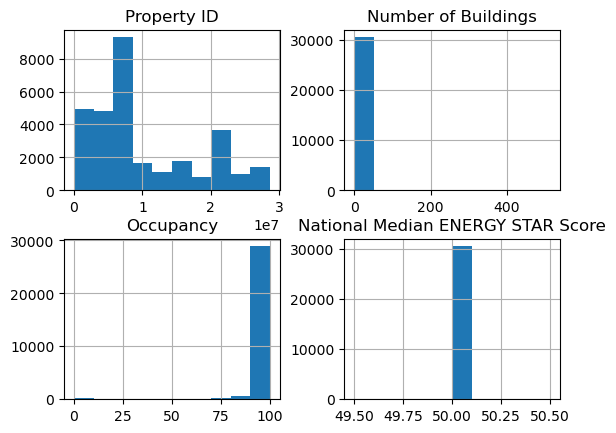

In [31]:
#To see an histogram of the df2 values and frequencies. 
#In this case, there are over 30,000 number of buildings, which is consistent with 30,485 rows.
#The occupancy levels are close to 100% and the national median energy star score is 50.
df2.hist()

In [32]:
# Group by Primary Property Type - Self Selected and count Property IDs to see which type of property type is the driver.

result = df2.groupby (['Primary Property Type - Self Selected'])['Property ID'].count().sort_values(ascending=False) 
total = result.sum()
# print the output
print (result)
print (f"\nTotal: {total}")

# Multifamily Housing is by far the largest building category with nearly 65% of the property types.
# The second one is office space with 8%.

Primary Property Type - Self Selected
Multifamily Housing                                      19732
Office                                                    2412
K-12 School                                               1842
Hotel                                                      606
College/University                                         478
Non-Refrigerated Warehouse                                 443
Manufacturing/Industrial Plant                             386
Retail Store                                               309
Self-Storage Facility                                      271
Other - Recreation                                         229
Residence Hall/Dormitory                                   229
Mixed Use Property                                         222
Worship Facility                                           207
Parking                                                    175
Distribution Center                                        166
Pre-school/Daycar

In [33]:
# Select the first 20 rows of the Primary Property Type - Self Selected gather 93.28% 
top_20 = result.iloc[:20]
total = top_20.sum()
Percentage=(top_20.sum()/30485)*100
# print the output
print (top_20)
print (f"\nTotal: {total}")
# f-string, which is a formatted string literal that allows you to embed expressions inside curly brackets.
#This will print the total in a separate row.
#You can also specify the number of decimal places you want to display by using a colon and a format specifier inside 
#the curly brackets.
print(f'The top 20 Primary Property Type represent {Percentage:.2f} %')

# As the Multifamily Hosusing with 19732 records represent 64.72%, I am going to focus my analysis on Multifamily Housing.

Primary Property Type - Self Selected
Multifamily Housing                                 19732
Office                                               2412
K-12 School                                          1842
Hotel                                                 606
College/University                                    478
Non-Refrigerated Warehouse                            443
Manufacturing/Industrial Plant                        386
Retail Store                                          309
Self-Storage Facility                                 271
Other - Recreation                                    229
Residence Hall/Dormitory                              229
Mixed Use Property                                    222
Worship Facility                                      207
Parking                                               175
Distribution Center                                   166
Pre-school/Daycare                                    151
Zoo                               

In [34]:
# Convert some of the columns that have object data type to numeric data type.

df2["Source EUI (kBtu/ft²)"] = pd.to_numeric(df2["Source EUI (kBtu/ft²)"], errors="coerce")
df2["Weather Normalized Source EUI (kBtu/ft²)"] = pd.to_numeric(df2["Weather Normalized Source EUI (kBtu/ft²)"], errors="coerce")
df2["National Median Source EUI (kBtu/ft²)"] = pd.to_numeric(df2["National Median Source EUI (kBtu/ft²)"], errors="coerce")
df2["Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)"] = pd.to_numeric(df2["Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)"], errors="coerce")
df2["Multifamily Housing - Gross Floor Area (ft²)"] = pd.to_numeric (df2["Multifamily Housing - Gross Floor Area (ft²)"], errors="coerce")
df2["Multifamily Housing - Number of Bedrooms"] = pd.to_numeric (df2["Multifamily Housing - Number of Bedrooms"], errors="coerce")
df2["Multifamily Housing - Total Number of Residential Living Units"] = pd.to_numeric (df2["Multifamily Housing - Total Number of Residential Living Units"], errors="coerce")



df2.head()

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_20176\1661077994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Source EUI (kBtu/ft²)"] = pd.to_numeric(df2["Source EUI (kBtu/ft²)"], errors="coerce")
C:\Users\Marcelo\AppData\Local\Temp\ipykernel_20176\1661077994.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Weather Normalized Source EUI (kBtu/ft²)"] = pd.to_numeric(df2["Weather Normalized Source EUI (kBtu/ft²)"], errors="coerce")
C:\Users\Marcelo\AppData\Local\Temp\ipykernel_20176\16610779

,Property ID,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postal Code,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,List of All Property Use Types (GFA) (ft²),Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,Occupancy,ENERGY STAR Score,National Median ENERGY STAR Score,Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²),Multifamily Housing - Gross Floor Area (ft²),Multifamily Housing - Number of Bedrooms,Multifamily Housing - Total Number of Residential Living Units,Property GFA - Calculated (Buildings) (ft²),Borough
0,6414946,4026780001,4059918,58-01 Grand Avenue,Queens,11378,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse (51749.0),Non-Refrigerated Warehouse,"51,749","1,930",Existing,1,50,96,50,13.0,13.5,55.9,0.6,NaN,NaN,NaN,"51,749",QUEENS
1,9793770,2042500026,2047795,1870 Pelham Parkway South,Bronx,10461,Multifamily Housing,Multifamily Housing,Multifamily Housing (52941.0),Multifamily Housing,"52,941","1,960",Existing,1,75,61,50,115.7,114.1,124.9,4.1,52941.0,74.0,57.0,"52,941",BRONX
2,10177418,4157040040,4300145,2011 Mott Ave,Far Rockaway,11691,Mixed Use Property,Mixed Use Property,"Office (17598.0), Retail Store (17598.0)",Office,"17,598","1,941",Existing,1,50,Not Available,50,136.4,136.7,89.3,4.6,NaN,NaN,NaN,"35,196",QUEENS
3,13511507,1016490009,1052383,215 East 99th Street,New York,10029,Multifamily Housing,Multifamily Housing,"Multifamily Housing (92898.0), Performing Arts...",Multifamily Housing,"92,898","1,898",Existing,1,100,64,50,107.4,107.2,118.7,4.3,92898.0,112.0,90.0,"107,234",MANHATTAN
4,14009907,4008350027,4017180,23-25 31 Street,Queens,11105,Medical Office,Medical Office,"Office (3760.0), Medical Office (71431.0)",Medical Office,"71,431","1,911",Existing,1,80,98,50,140.0,139.1,290.5,4.3,NaN,NaN,NaN,"75,191",QUEENS


In [35]:
# Group by Primary Property Type - Self Selected and sum by Weather Normalized Source EUI (kBtu/ft²)
# Weather Normalized Source EUI (kBtu/ft²) is the normalized source of energy use intensity by square foot
# In other words, it accounts for changes in weather (e.g. a hot year and less use of fuel to heat the buildings) and 
# I will use as the measure for energy consumption. The Source EUI accounts for usage and loss of energy in the entire 
# chain from production, distribution to final site consumption

result1 = df2.groupby (['Primary Property Type - Self Selected'])['Weather Normalized Source EUI (kBtu/ft²)'].sum().sort_values(ascending=False) 
total1 = result1.sum()


# Print the output
# Convert the string value to a float before formatting
print (result1.apply (lambda x: '{:,.0f}'.format (float(x))))

print (f"\nTotal: {total1:,.0f}")

#Here we can see clearly that Multifamily Housing leads the pack in terms of Energy Use Intensity.

Primary Property Type - Self Selected
Multifamily Housing                                      21,326,443
Office                                                      328,193
Other                                                       245,809
College/University                                          238,578
K-12 School                                                 211,540
Hotel                                                       108,356
Other - Recreation                                           67,863
Manufacturing/Industrial Plant                               67,141
Zoo                                                          65,256
Retail Store                                                 52,901
Supermarket/Grocery Store                                    42,309
Mixed Use Property                                           39,819
Non-Refrigerated Warehouse                                   37,691
Hospital (General Medical & Surgical)                        36,731
Data Cente

In [36]:
# Select the top 10 Property Type - Self Selected from the group by Weather Normalized Source EUI (kBtu/ft²) from above.
# The top 10 gather nearly 97% of the total. Multifamily alone accounts for 94%.

top_10WSEUI = result1.iloc[:10]
total1 = top_10WSEUI.sum()

# Convert the string to a float before dividing
Percentage1 = (float(top_10WSEUI.sum()) / 23416633) * 100

# print the output
print (top_10WSEUI.apply (lambda x: '{:,.0f}'.format (x)))

print (f"\nTotal: {total1:,.0f}")

print(f'The top 10 represent {Percentage1:.2f} %')

Primary Property Type - Self Selected
Multifamily Housing               21,326,443
Office                               328,193
Other                                245,809
College/University                   238,578
K-12 School                          211,540
Hotel                                108,356
Other - Recreation                    67,863
Manufacturing/Industrial Plant        67,141
Zoo                                   65,256
Retail Store                          52,901
Name: Weather Normalized Source EUI (kBtu/ft²), dtype: object

Total: 22,712,080
The top 10 represent 96.99 %


In [37]:
# Group by Primary Property Type - Self Selected and sum by Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)
# Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²) represents the total greenhouse emissions and it is the
# other measure I will be looking at.

result2 = df2.groupby (['Primary Property Type - Self Selected'])['Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)'].sum().sort_values(ascending=False) 
total2 = result2.sum()

# print the output

print (result2.apply (lambda x: '{:,.0f}'.format (x)))

print (f"\nTotal: {total2:,.0f}")


Primary Property Type - Self Selected
Multifamily Housing                                      1,037,902
Office                                                      12,457
College/University                                          11,131
K-12 School                                                  9,037
Other                                                        7,528
Hotel                                                        4,036
Zoo                                                          3,158
Other - Recreation                                           2,894
Manufacturing/Industrial Plant                               2,599
Retail Store                                                 1,848
Hospital (General Medical & Surgical)                        1,696
Mixed Use Property                                           1,509
Supermarket/Grocery Store                                    1,439
Non-Refrigerated Warehouse                                   1,403
Data Center             

In [38]:
# Select the top 10 Property Type - Self Selected from the above grouped by 
# Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²). The top 10 gather nearly 98%. 
#of the total. Even for greenhouse emissions Multifamily Housing alone represents 95%.

top_10GHG = result2.iloc[:10]
total2 = top_10GHG.sum()
Percentage2=(total2/1120080)*100

# print the output

print (top_10GHG.apply (lambda x: '{:,.0f}'.format (x)))

print (f"\nTotal: {total2:,.0f}")

print(f'The top 10 represent {Percentage2:.2f} %')


Primary Property Type - Self Selected
Multifamily Housing               1,037,902
Office                               12,457
College/University                   11,131
K-12 School                           9,037
Other                                 7,528
Hotel                                 4,036
Zoo                                   3,158
Other - Recreation                    2,894
Manufacturing/Industrial Plant        2,599
Retail Store                          1,848
Name: Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²), dtype: object

Total: 1,092,590
The top 10 represent 97.55 %


Check if the table below could be moved to output & visualization

In [39]:
# To create a new dataframe where I filter rows by selecting Multifamily Housing.

#Filter rows by Primary Property Type - Self Selected column equal to "Multifamily Housing".
# Also to make sure I only select "Multifamily Housing", I will select rows where Primary Property Type - Self Selected, 
# Primary Property Type - Portfolio Manager-Calculated and Largest Property Use Type equal to Multifamily Housing. 
# Construction Status is set to "existing" in order to eliminate some "test" records. 
# Because I am interested in records with Energy Star Score, I am excluding "not available" records for this metric.

filtered_df = df2.loc[(df2["Primary Property Type - Self Selected"] == "Multifamily Housing") & 
                      (df2["Primary Property Type - Portfolio Manager-Calculated"] == "Multifamily Housing") &
                      (df2["Largest Property Use Type"] == "Multifamily Housing") &
                      (df2["Construction Status"] == "Existing") &
                      (df2["ENERGY STAR Score"] != "Not Available")]



In [40]:
# By selecting the above parameters, the shape of the "filtered_df" dataframe 
#has been reduced from 30,485 rows to 17,811 rows.
filtered_df.shape

(17811, 26)

In [41]:
# To check for null values for the new dataframe. The null values in the Borough column reduced to 506.
# Also when converting Weather Normalized Source EUI (kBtu/ft²) to numeric, it introduced 1048 null values.

filtered_df.isnull().sum()

Property ID                                                          0
NYC Borough, Block and Lot (BBL)                                     0
NYC Building Identification Number (BIN)                             0
Address 1                                                            0
City                                                                 0
Postal Code                                                          0
Primary Property Type - Self Selected                                0
Primary Property Type - Portfolio Manager-Calculated                 0
List of All Property Use Types (GFA) (ft²)                           0
Largest Property Use Type                                            0
Largest Property Use Type - Gross Floor Area (ft²)                   0
Year Built                                                           0
Construction Status                                                  0
Number of Buildings                                                  0
Occupa

In [42]:
#To show only the rows that contain null values in filtered_df.isnull().sum()
# Select rows where any column has a null value.
null_rows = filtered_df[filtered_df.isnull().any(axis=1)]

# Display the null rows
null_rows

#Here I can see there are NaN values in the Weather Normalized Source EUI (kBtu/ft²) and Borough columns.

,Property ID,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postal Code,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,List of All Property Use Types (GFA) (ft²),Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,Occupancy,ENERGY STAR Score,National Median ENERGY STAR Score,Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²),Multifamily Housing - Gross Floor Area (ft²),Multifamily Housing - Number of Bedrooms,Multifamily Housing - Total Number of Residential Living Units,Property GFA - Calculated (Buildings) (ft²),Borough
27,15327445,2026820001,2005057,1200 Union Ave/1204 Union Ave,Bronx,10459,Multifamily Housing,Multifamily Housing,Multifamily Housing (37672.0),Multifamily Housing,"37,672","1,922",Existing,1,100,33,50,144.8,145.7,129.4,6.0,37672.0,52.0,48.0,"37,672",NaN
30,15332746,1020750036,1061888,500 West 144th street/144 Hamilton Place,New York,10031,Multifamily Housing,Multifamily Housing,Multifamily Housing (56688.0),Multifamily Housing,"56,688","1,920",Existing,1,100,80,50,97.4,98.1,122.7,4.0,56688.0,79.0,54.0,"56,688",NaN
221,24125286,2053860017,2074435,2820 Middle Town Road,Bronx,10461,Multifamily Housing,Multifamily Housing,Multifamily Housing (25200.0),Multifamily Housing,"25,200","1,926",Existing,1,90,17,50,162.7,163.7,128.7,7.2,25200.0,40.0,27.0,"25,200",NaN
283,24889838,4156650001,4452157,13-18/13-32 Dickens Street,Queens,11691,Multifamily Housing,Multifamily Housing,Multifamily Housing (34821.0),Multifamily Housing,"34,821","1,949",Existing,1,95,75,50,94.2,95.0,113.5,5.0,34821.0,58.0,42.0,"34,821",NaN
391,2771721,4108210060,4231514;4451927,91-32/34 195th Street,Queens,11423,Multifamily Housing,Multifamily Housing,Multifamily Housing (79709.0),Multifamily Housing,"79,709","1,950",Existing,1,100,72,50,110.1,110.5,129.3,4.7,79709.0,121.0,96.0,"79,709",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30418,26708346,1-01320-0121;1-01320-0018,1037606;1037603,235-241 E 46,new york,10017,Multifamily Housing,Multifamily Housing,Multifamily Housing (56486.0),Multifamily Housing,"56,486","1,900",Existing,2,100,55,50,130.4,133.3,135.0,5.6,56486.0,100.0,78.0,"56,486",NaN
30430,4398451,3-04595-0215,3346863;3346866,"5, 60, 80 East 93rd Street",Brooklyn,11212,Multifamily Housing,Multifamily Housing,"Multifamily Housing (676350.0), Supermarket/Gr...",Multifamily Housing,"676,350","1,976",Existing,8,100,62,50,111.7,112.6,121.2,3.7,676350.0,840.0,438.0,"698,850",NaN
30432,15633849,3073500055,3199670,2147 East 17th Street,Brooklyn,11229,Multifamily Housing,Multifamily Housing,Multifamily Housing (57562.0),Multifamily Housing,"57,562","1,939",Existing,1,100,68,50,113.3,NaN,128.8,5.2,57562.0,95.0,60.0,"57,562",BROOKLYN
30434,15633981,3053200009,3124032,31 Ocean Parkway,Brooklyn,11218,Multifamily Housing,Multifamily Housing,Multifamily Housing (90910.0),Multifamily Housing,"90,910","1,929",Existing,1,100,64,50,112.2,NaN,123.5,4.9,90910.0,118.0,83.0,"90,910",BROOKLYN


In [43]:
# I will take a look at the index and see if there are duplicates.
#To show duplicate records where the Property ID column has repeated values.
# Select rows where Property ID is duplicated.
duplicate_rows = filtered_df[filtered_df.duplicated(subset="Property ID")]

# Display the duplicate rows
print(duplicate_rows)

       Property ID        NYC Borough, Block and Lot (BBL)  \
4606       2715854               1-01222-0029;1-01222-9029   
4607       2719851                            1-01512-0123   
4624       3001555                            1-01522-0059   
4649      10855094                            1-01429-0013   
5837       6566329                            2-02944-0001   
6036      26712872                            2-04905-0360   
7770      25762196                            3-02033-0002   
7936       4393916                            1-00861-0004   
8675       2384172                            1-01510-0030   
9294       3883948                            1-00828-0001   
9875      10821833                            1-02037-0011   
9876      10821842                            1-02037-0001   
9877      10883506  1-02037-0011;1-02037-0001;1-02016-0060   
10135      6365616               1-01171-7510;1-01171-0164   
10137      6674826                            1-01171-0062   
10332   

In [44]:
#To see duplicate rows in a tabular form.
duplicate_rows

,Property ID,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postal Code,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,List of All Property Use Types (GFA) (ft²),Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,Occupancy,ENERGY STAR Score,National Median ENERGY STAR Score,Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²),Multifamily Housing - Gross Floor Area (ft²),Multifamily Housing - Number of Bedrooms,Multifamily Housing - Total Number of Residential Living Units,Property GFA - Calculated (Buildings) (ft²),Borough
4606,2715854,1-01222-0029;1-01222-9029,1032499,100 West 92nd Street,New York,10025,Multifamily Housing,Multifamily Housing,"K-12 School (6017.0), Multifamily Housing (200...",Multifamily Housing,"200,607","1,969",Existing,2,100,96,50,109.6,110.7,175.7,4.9,200607.0,600.00,400.0,"206,624",MANHATTAN
4607,2719851,1-01512-0123,1047667,135 East 83rd Street,New York,10028,Multifamily Housing,Multifamily Housing,"Multifamily Housing (122436.0), Supermarket/Gr...",Multifamily Housing,"122,436","1,960",Existing,1,100,9,50,207.8,210.1,145.0,7.8,122436.0,159.00,60.0,"128,436",MANHATTAN
4624,3001555,1-01522-0059,1048406,130 East 94th Street,New York,10128,Multifamily Housing,Multifamily Housing,Multifamily Housing (54188.0),Multifamily Housing,"54,188","1,924",Existing,1,100,63,50,105.8,107.5,116.1,4.6,54188.0,64.00,45.0,"54,188",MANHATTAN
4649,10855094,1-01429-0013,1044025,225 E 74 ST,New York,10021,Multifamily Housing,Multifamily Housing,Multifamily Housing (93077.0),Multifamily Housing,"93,077","1,938",Existing,1,100,82,50,82.1,84.3,105.6,3.8,93077.0,102.00,84.0,"93,077",MANHATTAN
5837,6566329,2-02944-0001,2092141;2092142,1805 Crotona Avenue,Bronx,10457,Multifamily Housing,Multifamily Housing,"Multifamily Housing (289850.0), Parking (4200.0)",Multifamily Housing,"289,850","1,962",Existing,2,100,34,50,153.0,154.8,138.0,6.5,289850.0,593.00,281.0,"289,850",BRONX
6036,26712872,2-04905-0360,2093740;2093741;2093742;2093743;2093744;209374...,1870 Schieffelin Pl,Bronx,10466,Multifamily Housing,Multifamily Housing,"Multifamily Housing (336240.0), Parking (26400.0)",Multifamily Housing,"336,240","1,962",Existing,12,100,8,50,210.0,211.2,147.7,8.7,336240.0,784.00,451.0,"336,240",BRONX
7770,25762196,3-02033-0002,3395154,45 Clermont Avenue,Brooklyn,11205,Multifamily Housing,Multifamily Housing,Multifamily Housing (140037.0),Multifamily Housing,"140,037","2,011",Existing,1,100,99,50,59.5,60.1,108.9,2.4,140037.0,134.00,101.0,"140,037",BROOKLYN
7936,4393916,1-00861-0004,1016983,309 5th Avenue,New York,10016,Multifamily Housing,Multifamily Housing,"Multifamily Housing (170520.0), Other (5167.0)",Multifamily Housing,"170,520","2,013",Existing,1,90,77,50,96.4,96.4,117.4,3.6,170520.0,200.00,100.0,"175,687",MANHATTAN
8675,2384172,1-01510-0030,1047567,163 East 81st Street,New York,10028,Multifamily Housing,Multifamily Housing,Multifamily Housing (65721.0),Multifamily Housing,"65,721","1,927",Existing,1,100,89,50,83.1,84.2,116.0,3.6,65721.0,77.00,43.0,"65,721",MANHATTAN
9294,3883948,1-00828-0001,1015632,776 Sixth Avenue,New York,10001,Multifamily Housing,Multifamily Housing,"Multifamily Housing (377637.0), Other (76901.0)",Multifamily Housing,"377,637","2,001",Existing,1,90,29,50,133.4,133.6,116.7,5.1,377637.0,401.00,387.0,"454,538",MANHATTAN


In [45]:
#To understand how many records are duplicated. There are 82 duplicate rows related to Multifamily Housing.
duplicate_rows.shape

(82, 26)

In [46]:
#To drop duplicated rows by Property ID.
# Create a new, "unique_rows", dataframe with unique rows by keeping the first value of the repeated rows (Property IDs).
unique_rows = filtered_df.drop_duplicates(subset="Property ID", keep="first")

# Display the unique rows.
print(unique_rows)

       Property ID NYC Borough, Block and Lot (BBL)  \
1          9793770                       2042500026   
3         13511507                       1016490009   
5         14377690                       3067300001   
8         15176247                       4098150067   
9         15176327                       4096790052   
...            ...                              ...   
30462      6699459                       3016620012   
30466      6681872                     1-00504-0036   
30467      6682201                     1-00504-0031   
30477      6875712                       1021700251   
30478      6875723                       4098460011   

      NYC Building Identification Number (BIN)                    Address 1  \
1                                      2047795    1870 Pelham Parkway South   
3                                      1052383         215 East 99th Street   
5                                      3180535               1680 Ocean Ave   
8                      

In [47]:
#To see how many rows there are after dropping duplicate rows (17,811 filtered_df rows - 82 duplicates = 17,729).
unique_rows.shape

(17729, 26)

In [48]:
#To see if there are fewer null values after dropping duplicate rows. Just 2 null values were eliminated from the 
#Borough column (506-504=2), but the Weather Normalized Source EUI (kBtu/ft²) still has 1048 null values and 
# Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²) has only one null (negligible).
unique_rows.isnull().sum()

Property ID                                                          0
NYC Borough, Block and Lot (BBL)                                     0
NYC Building Identification Number (BIN)                             0
Address 1                                                            0
City                                                                 0
Postal Code                                                          0
Primary Property Type - Self Selected                                0
Primary Property Type - Portfolio Manager-Calculated                 0
List of All Property Use Types (GFA) (ft²)                           0
Largest Property Use Type                                            0
Largest Property Use Type - Gross Floor Area (ft²)                   0
Year Built                                                           0
Construction Status                                                  0
Number of Buildings                                                  0
Occupa

In [49]:
#Now it is more manageable to see the data types. There are still 15 columns with "object" data type.
unique_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17729 entries, 1 to 30478
Data columns (total 26 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Property ID                                                     17729 non-null  int64  
 1   NYC Borough, Block and Lot (BBL)                                17729 non-null  object 
 2   NYC Building Identification Number (BIN)                        17729 non-null  object 
 3   Address 1                                                       17729 non-null  object 
 4   City                                                            17729 non-null  object 
 5   Postal Code                                                     17729 non-null  object 
 6   Primary Property Type - Self Selected                           17729 non-null  object 
 7   Primary Property Type - Portfolio Manager-Calculated  

In [50]:
# One of the biggest tasks to address is the postal code. There are postal codes erroneously input. I will use postal code
# to impute the missing boroughs later.

#To replace values in Postal Codes using ".loc"

#First, create a boolean mask that indicates which rows have the postal codes that need to be replaced. 
#I can use the isin method of the pandas series object to check if the values are in a list or a set. 


# Create a list or a set of the postal codes that need to be replaced
postal_codes = {10548, 10977, 11019, 11036, 11069, 11124, 11474, 12226, 111201, 112126939, 112211760, 114342300, 
                '10003-1316', '10013 ', '10024-3801', '10024-3822', '10025-3621', '10031-6032', '11232-3165',
                '11385-6201', '5 East 196th St', '10013 \u200e'}

# Create a boolean mask that indicates which rows have the postal codes that need to be replaced
mask = unique_rows['Postal Code'].isin(postal_codes)


#Second, I use the ".loc" method to select and update the rows that match the mask. 
#I can use the map method of the pandas series object to apply a dictionary to the values.

# Create a dictionary that maps the old postal codes to the new ones
replacements = {10548:10458, 10977:11207, 11019:10019, 11036:10036, 11069:10069, 11124:11224, 11474:11423, 12226:11226,
                111201:11201, 112126939:11212, 112211760:11221, 114342300:11434, '10003-1316':10003, '10013 ':10013, 
                '10024-3801':10024, '10024-3822':10024, '10025-3621':10025, '10031-6032':10031, '11232-3165':11232, 
                '11385-6201':11385, '5 East 196th St':10468, '10013 \u200e':10013}

# Use the .loc method to select and update the rows that match the mask
unique_rows.loc[mask, 'Postal Code'] = unique_rows.loc[mask, 'Postal Code'].map(replacements)

In [51]:
#To convert the postal code numeric values to integers, you can use the astype method of the pandas Series object. 
#This method allows you to specify the data type you want to use, such as int or int64. 


# Convert the numeric values to integers
unique_rows["Postal Code"] = unique_rows["Postal Code"].astype(int)

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_20176\3375297657.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_rows["Postal Code"] = unique_rows["Postal Code"].astype(int)


In [52]:
# I found easier to map the postal codes to boroughs using Excel, so I created a file Zip Codes by Borough.xlsx

#One way to quickly create a list of the zip codes from an Excel file is to use the pandas library in Python. 
#Pandas can read Excel files and convert them into dataframes, which are tabular data structures that can be 
#manipulated easily

# Read the Excel file and select the column with zip codes
df4 = pd.read_excel("Zip Codes by Borough.xlsx", sheet_name="Sheet2")
zip_codes = df4["ZipCode"]
borough_names = df4["Borough"]

# Convert the column values into a list
zip_list = zip_codes.tolist()
borough_list= borough_names.tolist()

# Print the list
print(zip_list)

print(borough_list)

[1367, 1368, 10001, 10002, 10003, 10004, 10005, 10006, 10007, 10009, 10010, 10011, 10012, 10013, 10014, 10015, 10016, 10017, 10018, 10019, 10020, 10021, 10022, 10023, 10024, 10025, 10026, 10027, 10028, 10029, 10030, 10031, 10032, 10033, 10034, 10035, 10036, 10037, 10038, 10039, 10040, 10041, 10044, 10045, 10048, 10055, 10060, 10065, 10069, 10075, 10090, 10095, 10098, 10099, 10103, 10104, 10105, 10106, 10107, 10110, 10111, 10112, 10115, 10118, 10119, 10120, 10121, 10122, 10123, 10128, 10151, 10152, 10153, 10154, 10155, 10158, 10161, 10162, 10165, 10166, 10167, 10168, 10169, 10170, 10171, 10172, 10173, 10174, 10175, 10176, 10177, 10178, 10179, 10199, 10270, 10271, 10278, 10279, 10280, 10281, 10282, 10301, 10302, 10303, 10304, 10305, 10306, 10307, 10308, 10309, 10310, 10311, 10312, 10314, 10367, 10451, 10452, 10453, 10454, 10455, 10456, 10457, 10458, 10459, 10460, 10461, 10462, 10463, 10464, 10465, 10466, 10467, 10468, 10469, 10470, 10471, 10472, 10473, 10474, 10475, 10528, 10546, 10548, 

In [53]:
#To impute values of borough by creating a dictionary with the values of the zip code and the associated boroughs, 
#you can use the following steps:

#First, you need to have a list of zip codes and a list of boroughs that correspond to each other.

#Second, you need to create a dictionary that maps each zip code to its borough. 

#You can use a dictionary comprehension or the dict constructor with zip to do this. 

# Create lists of zip codes and boroughs. I copied the values contained in the below lists from the above step.
zip_codes = [10001, 10002, 10003, 10004, 10005, 10006, 10007, 10009, 10010, 10011, 10012, 10013, 10014, 10015, 10016,
             10017, 10018, 10019, 10020, 10021, 10022, 10023, 10024, 10025, 10026, 10027, 10028, 10029, 10030, 10031,
             10032, 10033, 10034, 10035, 10036, 10037, 10038, 10039, 10040, 10041, 10044, 10045, 10048, 10055, 10060,
             10065, 10069, 10075, 10090, 10095, 10098, 10099, 10103, 10104, 10105, 10106, 10107, 10110, 10111, 10112,
             10115, 10118, 10119, 10120, 10121, 10122, 10123, 10128, 10151, 10152, 10153, 10154, 10155, 10158, 10161,
             10162, 10165, 10166, 10167, 10168, 10169, 10170, 10171, 10172, 10173, 10174, 10175, 10176, 10177, 10178,
             10199, 10270, 10271, 10278, 10279, 10280, 10281, 10282, 10301, 10302, 10303, 10304, 10305, 10306, 10307,
             10308, 10309, 10310, 10311, 10312, 10314, 10451, 10452, 10453, 10454, 10455, 10456, 10457, 10458, 10459,
             10460, 10461, 10462, 10463, 10464, 10465, 10466, 10467, 10468, 10469, 10470, 10471, 10472, 10473, 10474,
             10475, 10548, 10701, 10705, 10977, 11004, 11005, 11022, 11023, 11036, 11069, 11101, 11102, 11103, 11104,
             11105, 11106, 11109, 11124, 11201, 11203, 11204, 11205, 11206, 11207, 11208, 11209, 11210, 11211, 11212, 
             11213, 11214, 11215, 11216, 11217, 11218, 11219, 11220, 11221, 11222, 11223, 11224, 11225, 11226, 11228, 
             11229, 11230, 11231, 11232, 11233, 11234, 11235, 11236, 11237, 11238, 11239, 11241, 11242, 11243, 11249, 
             11252, 11256, 11351, 11354, 11355, 11356, 11357, 11358, 11359, 11360, 11361, 11362, 11363, 11364, 11365, 
             11366, 11367, 11368, 11369, 11370, 11371, 11372, 11373, 11374, 11375, 11377, 11378, 11379, 11385, 11411, 
             11412, 11413, 11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421, 11422, 11423, 11426, 11427, 11428,
             11429, 11430, 11432, 11433, 11434, 11435, 11436, 11474, 11550, 11590, 11691, 11692, 11693, 11694, 11697, 
             11713, 12226, 112126939, 112211760, 114342300]
borough = ['MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 
           'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 
           'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 
           'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 
           'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 
           'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 
           'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 
           'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 
           'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 
           'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 
           'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 
           'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 'MANHATTAN', 
           'MANHATTAN', 'MANHATTAN', 'STATEN IS', 'STATEN IS', 'STATEN IS', 'STATEN IS', 'STATEN IS', 'STATEN IS', 
           'STATEN IS', 'STATEN IS', 'STATEN IS', 'STATEN IS', 'STATEN IS', 'STATEN IS', 'STATEN IS', 'BRONX', 'BRONX', 
           'BRONX', 'BRONX', 'BRONX', 'BRONX', 'BRONX', 'BRONX', 'BRONX', 'BRONX', 'BRONX', 'BRONX', 'BRONX', 'BRONX', 
           'BRONX', 'BRONX', 'BRONX', 'BRONX', 'BRONX', 'BRONX', 'BRONX', 'BRONX', 'BRONX', 'BRONX', 'BRONX', 'BRONX', 
           'YONKERS', 'BRONX', 'BROOKLYN', 'QUEENS', 'QUEENS', 'NASSAU COUNTY', 'NASSAU COUNTY', 'MANHATTAN', 'MANHATTAN', 
           'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 
           'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 
           'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN',
           'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN',
           'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 
           'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS',
           'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS',
           'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 
           'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS',
           'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS',
           'QUEENS', 'QUEENS', 'NASSAU COUNTY', 'NASSAU COUNTY', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS', 'QUEENS',
           'SUFFOLK COUNTY', 'BROOKLYN', 'BROOKLYN', 'BROOKLYN', 'QUEENS']

In [54]:
# Create a dictionary with zip codes as keys and boroughs as values
zip_borough_dict = {zip_code: borough for zip_code, borough in zip(zip_codes, borough)}

In [55]:
#I was getting a KeyError that could have meant that the zip code 11124 was not in the zip_borough_dict dictionary.
#This could happen if the dictionary did not have all the possible zip codes in New York City, 
#or if the DataFrame had some invalid or incorrect zip codes. That did not seem to be the case.

#To fix this error, you need to make sure that your dictionary has all the zip codes that you need, 
#or that your DataFrame has only valid zip codes. 
#You can also use a try-except block to handle the KeyError gracefully, and assign a default value or skip the row 
#if the zip code is not found. 

# Iterate over the rows with null values in the borough column
for index, row in unique_rows[unique_rows["Borough"].isnull()].iterrows():
    # Get the zip code of the current row
    zip_code = row["Postal Code"]
    # Try to get the borough of the current zip code from the dictionary
    try:
        borough = zip_borough_dict[zip_code]
    # If the zip code is not in the dictionary, handle the KeyError
    except KeyError:
        # Print a warning message
        print(f"Zip code {zip_code} not found in the dictionary")
        # Assign a default value or skip the row
        borough = "Unknown" # or continue
    # Update the borough value of the current row
    unique_rows.loc[index, "Borough"] = borough

In [56]:
#To check if Postal Codes changed its data type. Here I can see that now is an integer.
unique_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17729 entries, 1 to 30478
Data columns (total 26 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Property ID                                                     17729 non-null  int64  
 1   NYC Borough, Block and Lot (BBL)                                17729 non-null  object 
 2   NYC Building Identification Number (BIN)                        17729 non-null  object 
 3   Address 1                                                       17729 non-null  object 
 4   City                                                            17729 non-null  object 
 5   Postal Code                                                     17729 non-null  int32  
 6   Primary Property Type - Self Selected                           17729 non-null  object 
 7   Primary Property Type - Portfolio Manager-Calculated  

In [57]:
#To make sure the postal code values make sense. Here we can see that few of them seem to be zip+4 
#5 digits for the zip + 4 digits or they have more than 5 digits.
unique_rows['Postal Code'].unique()

array([    10461,     10029,     11230,     11432,     11435,     11211,
           10457,     10459,     10453,     10452,     10456,     10031,
           10027,     11355,     11229,     11377,     10013,     11222,
           10458,     11369,     11385,     11354,     11223,     10468,
           10467,     11234,     10026,     10032,     10030,     10014,
           10011,     10016,     11373,     11201,     10022,     11249,
           11204,     10033,     11216,     11375,     11106,     11221,
           11368,     10002,     10003,     10001,     10065,     10025,
           10034,     10462,     11231,     10018,     11691,     11102,
           11238,     10314,     10454,     10039,     11101,     11235,
           11226,     10455,     10009,     10460,     11219,     11213,
           11212,     11225,     11423,     10040,     11218,     10024,
           10028,     10023,     10463,     10019,     11372,     11418,
           11379,     11374,     10471,     11364, 

In [58]:
#There are still issues with few zip codes which I will replace below

replace_dict1 = {100037:10037, 100038:10038, 113731:11373, 114133:11435, 100381836:10038, 104674512:10467,
                112126939:11212, 112211760:11221, 112290523:11209, 114342300:11434}

unique_rows['Postal Code'].replace(replace_dict1, inplace=True)

# Print the DataFrame
unique_rows['Postal Code'].unique()


C:\Users\Marcelo\AppData\Local\Temp\ipykernel_20176\3279650399.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_rows['Postal Code'].replace(replace_dict1, inplace=True)


array([10461, 10029, 11230, 11432, 11435, 11211, 10457, 10459, 10453,
       10452, 10456, 10031, 10027, 11355, 11229, 11377, 10013, 11222,
       10458, 11369, 11385, 11354, 11223, 10468, 10467, 11234, 10026,
       10032, 10030, 10014, 10011, 10016, 11373, 11201, 10022, 11249,
       11204, 10033, 11216, 11375, 11106, 11221, 11368, 10002, 10003,
       10001, 10065, 10025, 10034, 10462, 11231, 10018, 11691, 11102,
       11238, 10314, 10454, 10039, 11101, 11235, 11226, 10455, 10009,
       10460, 11219, 11213, 11212, 11225, 11423, 10040, 11218, 10024,
       10028, 10023, 10463, 10019, 11372, 11418, 11379, 11374, 10471,
       11364, 11209, 10128, 11206, 11215, 11207, 11236, 10472, 10010,
       11023, 11205, 11203, 10021, 11208, 10301, 10701, 11103, 11232,
       11357, 11220, 10466, 10017, 10451, 11358, 11104, 11415, 10075,
       10035, 10470, 10486, 11210, 11214, 11217, 11414, 10305, 10037,
       11429, 10312, 11427, 11421, 11367, 11365, 11237, 10469, 10012,
       11433, 10302,

In [59]:
#I got rid off the null values for Borough. I will impute the Weather Normalized Source EUI (kBtu/ft²) NaN later.
unique_rows.isnull().sum()

Property ID                                                          0
NYC Borough, Block and Lot (BBL)                                     0
NYC Building Identification Number (BIN)                             0
Address 1                                                            0
City                                                                 0
Postal Code                                                          0
Primary Property Type - Self Selected                                0
Primary Property Type - Portfolio Manager-Calculated                 0
List of All Property Use Types (GFA) (ft²)                           0
Largest Property Use Type                                            0
Largest Property Use Type - Gross Floor Area (ft²)                   0
Year Built                                                           0
Construction Status                                                  0
Number of Buildings                                                  0
Occupa

In [60]:
# Convert the ENERGY STAR Score column from object to integer and ignore the errors.
unique_rows["ENERGY STAR Score"] = pd.to_numeric(unique_rows["ENERGY STAR Score"], errors="coerce")

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_20176\1485513742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_rows["ENERGY STAR Score"] = pd.to_numeric(unique_rows["ENERGY STAR Score"], errors="coerce")


In [61]:
#Just to see the values contained within the Energy Star Column. I created a separate Excel file which I called 
#"Energy Star Score.xlsx". Then I read it and created a list to display all the values.
# Read the Excel file and select the column with zip codes
df5 = pd.read_excel("Energy Star Score.xlsx", sheet_name="Sheet1")
ESS = df5["ENERGY STAR Score"]

# Convert the column values into a list
ESS_list = ESS.tolist()

# Print the list
print(ESS_list)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [62]:
# I will use the Energy Star Score to derive the efficiency grade letter.

#To create a new column called Building Energy Efficiency Rating (BEER) based on the ENERGY STAR Score in Python.

#Define a function that takes the ENERGY STAR Score as an input and returns the corresponding BEER value
#as an output. Use an if-elif-else statement to implement the logic. 

# Define a function that assigns a letter grade based on the score based on the below grid:

# A Score is equal to or greater than 85
# B Score is equal to or greater than 70 but less than 85
# C Score is equal to or greater than 55 but less than 70
# D Score is less than 55
# F Building did not submit required benchmarking information
# N Building exempted from benchmarking or not covered by the ENERGYSTAR® program

def grade(score):
    if score >= 85:
        return "A"
    elif score >= 70:
        return "B"
    elif score >= 55:
        return "C"
    else:
        return "D"
    
#Apply the function to the ENERGY STAR Score column of the data frame and assign the result to a new column called BEER.
#Use the apply method of the pandas series object to do this. 

# Apply the function to the ENERGY STAR Score (ESS) column and create a new column called BEER

df5["BEER"] = df5["ENERGY STAR Score"].apply(grade)

unique_rows["BEER"] = unique_rows["ENERGY STAR Score"].apply(grade)

#This will create a new column called BEER in the data frame that contains the values A, B, C, or D based on the 
#ENERGY STAR Score. You can also use other methods to create a new column, such as map, np.select, or pd.cut. 
#For more information, you can refer to the pandas documentation or these web search results. 

#Learn more: 1-stackoverflow.com, 2-stackoverflow.com, 3-stackoverflow.com

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_20176\1338449492.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_rows["BEER"] = unique_rows["ENERGY STAR Score"].apply(grade)


In [63]:
#To show the recently created BEER column at the far right.
unique_rows.head()

,Property ID,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postal Code,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,List of All Property Use Types (GFA) (ft²),Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,Occupancy,ENERGY STAR Score,National Median ENERGY STAR Score,Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²),Multifamily Housing - Gross Floor Area (ft²),Multifamily Housing - Number of Bedrooms,Multifamily Housing - Total Number of Residential Living Units,Property GFA - Calculated (Buildings) (ft²),Borough,BEER
1,9793770,2042500026,2047795,1870 Pelham Parkway South,Bronx,10461,Multifamily Housing,Multifamily Housing,Multifamily Housing (52941.0),Multifamily Housing,"52,941","1,960",Existing,1,75,61,50,115.7,114.1,124.9,4.1,52941.0,74.0,57.0,"52,941",BRONX,C
3,13511507,1016490009,1052383,215 East 99th Street,New York,10029,Multifamily Housing,Multifamily Housing,"Multifamily Housing (92898.0), Performing Arts...",Multifamily Housing,"92,898","1,898",Existing,1,100,64,50,107.4,107.2,118.7,4.3,92898.0,112.0,90.0,"107,234",MANHATTAN,C
5,14377690,3067300001,3180535,1680 Ocean Ave,Brooklyn,11230,Multifamily Housing,Multifamily Housing,Multifamily Housing (68400.0),Multifamily Housing,"68,400","1,935",Existing,1,80,61,50,108.6,109.0,117.3,4.9,68400.0,80.0,67.0,"68,400",BROOKLYN,C
8,15176247,4098150067,4210063,88-24 Merrick Blvd,Jamaica,11432,Multifamily Housing,Multifamily Housing,Multifamily Housing (82576.0),Multifamily Housing,"82,576","1,937",Existing,1,100,16,50,156.1,156.9,121.8,7.2,82576.0,115.0,78.0,"82,576",QUEENS,D
9,15176327,4096790052,4206819,90-11 149 str,Jamaica,11435,Multifamily Housing,Multifamily Housing,Multifamily Housing (136000.0),Multifamily Housing,"136,000","1,933",Existing,1,100,71,50,104.3,104.0,121.3,4.7,136000.0,190.0,120.0,"136,000",QUEENS,B


In [64]:
#To convert the Year Built to datetime.

# As there seems that some values contain commas, replace the commas with empty strings in the Year Built column
#unique_rows["Year Built"] = unique_rows["Year Built"].str.replace(",", "")

# Define a custom function to replace commas with empty strings
def remove_comma(x):
    # If x is a string, use the replace method
    if isinstance(x, str):
        return x.replace(",", "")
    # Otherwise, return x as it is
    else:
        return x

# Apply the custom function to the Year Built column
unique_rows["Year Built"] = unique_rows["Year Built"].apply(remove_comma)

# Convert the column values to datetime types
unique_rows["Year Built"] = pd.to_datetime(unique_rows["Year Built"], format="%Y", errors="coerce")


# Print the data type of the column
print(unique_rows["Year Built"].dtype)



datetime64[ns]


C:\Users\Marcelo\AppData\Local\Temp\ipykernel_20176\2205037619.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_rows["Year Built"] = unique_rows["Year Built"].apply(remove_comma)
C:\Users\Marcelo\AppData\Local\Temp\ipykernel_20176\2205037619.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_rows["Year Built"] = pd.to_datetime(unique_rows["Year Built"], format="%Y", errors="coerce")


In [65]:
# I would like to create bins to contain the Year Built

# Define a function that assigns a year bracket based on the year built

# Convert the integer to a Timestamp object

def year_bracket(year):
  # Create a Timestamp object from the integer 1900
  year_1900 = pd.Timestamp(1900, 1, 1)
  if year < year_1900:
    return "<1900"
  elif year < year_1900 + pd.DateOffset(years=10):  
    return "1900-1909"
  elif year < year_1900 + pd.DateOffset(years=20):  
    return "1910-1919"  
  elif year < year_1900 + pd.DateOffset(years=30):  
    return "1920-1929"
  elif year < year_1900 + pd.DateOffset(years=40):  
    return "1930-1939"
  elif year < year_1900 + pd.DateOffset(years=50):  
    return "1940-1949"  
  elif year < year_1900 + pd.DateOffset(years=60):  
    return "1950-1959"
  elif year < year_1900 + pd.DateOffset(years=70):  
    return "1960-1969"
  elif year < year_1900 + pd.DateOffset(years=80):  
    return "1970-1979"  
  elif year < year_1900 + pd.DateOffset(years=90):  
    return "1980-1989"
  elif year < year_1900 + pd.DateOffset(years=100):  
    return "1990-1999"
  elif year < year_1900 + pd.DateOffset(years=110):  
    return "2000-2009"  
  elif year < year_1900 + pd.DateOffset(years=120):  
    return "2010-2019"
  else:
    return "2020-2022"

#Apply the function to the Year Built column and create a new column called Year Bracket
unique_rows["Year Bracket"] = unique_rows["Year Built"].apply(year_bracket)

#Print the first 10 rows of the dataframe. See the last column Year Bracket
unique_rows.head()

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_20176\3259227383.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_rows["Year Bracket"] = unique_rows["Year Built"].apply(year_bracket)


,Property ID,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postal Code,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,List of All Property Use Types (GFA) (ft²),Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,Occupancy,ENERGY STAR Score,National Median ENERGY STAR Score,Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²),Multifamily Housing - Gross Floor Area (ft²),Multifamily Housing - Number of Bedrooms,Multifamily Housing - Total Number of Residential Living Units,Property GFA - Calculated (Buildings) (ft²),Borough,BEER,Year Bracket
1,9793770,2042500026,2047795,1870 Pelham Parkway South,Bronx,10461,Multifamily Housing,Multifamily Housing,Multifamily Housing (52941.0),Multifamily Housing,"52,941",1960-01-01,Existing,1,75,61,50,115.7,114.1,124.9,4.1,52941.0,74.0,57.0,"52,941",BRONX,C,1960-1969
3,13511507,1016490009,1052383,215 East 99th Street,New York,10029,Multifamily Housing,Multifamily Housing,"Multifamily Housing (92898.0), Performing Arts...",Multifamily Housing,"92,898",1898-01-01,Existing,1,100,64,50,107.4,107.2,118.7,4.3,92898.0,112.0,90.0,"107,234",MANHATTAN,C,<1900
5,14377690,3067300001,3180535,1680 Ocean Ave,Brooklyn,11230,Multifamily Housing,Multifamily Housing,Multifamily Housing (68400.0),Multifamily Housing,"68,400",1935-01-01,Existing,1,80,61,50,108.6,109.0,117.3,4.9,68400.0,80.0,67.0,"68,400",BROOKLYN,C,1930-1939
8,15176247,4098150067,4210063,88-24 Merrick Blvd,Jamaica,11432,Multifamily Housing,Multifamily Housing,Multifamily Housing (82576.0),Multifamily Housing,"82,576",1937-01-01,Existing,1,100,16,50,156.1,156.9,121.8,7.2,82576.0,115.0,78.0,"82,576",QUEENS,D,1930-1939
9,15176327,4096790052,4206819,90-11 149 str,Jamaica,11435,Multifamily Housing,Multifamily Housing,Multifamily Housing (136000.0),Multifamily Housing,"136,000",1933-01-01,Existing,1,100,71,50,104.3,104.0,121.3,4.7,136000.0,190.0,120.0,"136,000",QUEENS,B,1930-1939


In [66]:
#To save the unique_rows data frame to Excel
#unique_rows.to_excel("Unique_Rows6.xlsx", sheet_name="data", index=True)

In [67]:
#To see how many properties records there are by borough sorted in descending order.
df5 = unique_rows.groupby (['Borough'])['Property ID'].count().sort_values(ascending=False)
total = df5.sum()
print (df5)
print (f"\nTotal: {total}")



Borough
MANHATTAN         6016
BROOKLYN          4698
BRONX             4055
QUEENS            2828
STATEN IS          125
NASSAU COUNTY        5
SUFFOLK COUNTY       1
YONKERS              1
Name: Property ID, dtype: int64

Total: 17729


In [68]:
#To see how many properties records there are by Building Energy Efficiency Ratings (BEER) sorted in descending order.
df6 = unique_rows.groupby (['BEER'])['Property ID'].count().sort_values(ascending=False)
total = df6.sum()
print (df6)
print (f"\nTotal: {total}")

BEER
D    6514
A    4934
B    3402
C    2879
Name: Property ID, dtype: int64

Total: 17729


In [69]:
#To see how many properties records there are by Energy Use Intensity by Borough sorted in descending order.
df_EUI = unique_rows.groupby (['Borough'])['Weather Normalized Source EUI (kBtu/ft²)'].sum().sort_values(ascending=False)
total = df_EUI.sum()
print (df_EUI)
print (f"\nTotal: {total}")



Borough
MANHATTAN         687594.8
BROOKLYN          487724.5
BRONX             458368.1
QUEENS            287400.8
STATEN IS          15402.5
NASSAU COUNTY        308.9
YONKERS               83.4
SUFFOLK COUNTY        25.6
Name: Weather Normalized Source EUI (kBtu/ft²), dtype: float64

Total: 1936908.5999999999


In [70]:
#To see how many properties records there are by Green House (GHG) Emissions by Borough sorted in descending order.
df_GHG = unique_rows.groupby (['Borough'])['Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)'].sum().sort_values(ascending=False)
total = df_GHG.sum()
print (df_GHG)
print (f"\nTotal: {total}")

Borough
MANHATTAN         31113.3
BROOKLYN          21934.6
BRONX             21879.5
QUEENS            13553.0
STATEN IS           656.0
NASSAU COUNTY        28.4
YONKERS               3.5
SUFFOLK COUNTY        1.4
Name: Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²), dtype: float64

Total: 89169.7


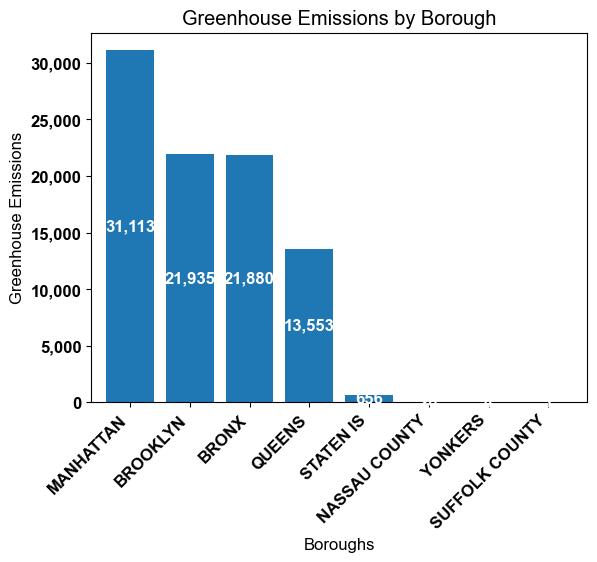

In [71]:
# Set the font parameters
plt.rcParams['font.family'] = 'arial'
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.style'] = 'normal'

# Create a bar chart
ax = df_GHG.plot(kind='bar', x='Borough', y='Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)', label='Property ID', width=0.8)
ax.set_title("Greenhouse Emissions by Borough")

# Add a title for the y-axis
ax.set_ylabel('Greenhouse Emissions')

# Change the name of the x-axis
ax.set_xlabel('Boroughs')


#Center the labels in the bars
ax.bar_label(ax.containers[0], label_type='center', color='white', fmt='{0:,.0f}')


# Rotate and align the x-axis labels
plt.xticks(rotation=45, ha='right')

#To show the values on the y-axis in thousands, you can use the .yaxis.set_major_formatter() method on the ax 
#object and pass a StrMethodFormatter object with the format string ‘{x:,.0f}K’. 
#This will format the y-axis values with a comma as the thousands separator, a zero decimal precision, 
#and a K suffix to indicate thousands. For example, you can do the following:
# Import the StrMethodFormatter class
from matplotlib.ticker import StrMethodFormatter

# Format the y-axis values in thousands
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))


# Show the plot
plt.show()

In [72]:
#To see how many properties records there are by Building Energy Efficiency Ratings (BEER) sorted in descending order.
df10 = unique_rows.groupby (['Borough','BEER'])['Property ID'].count().sort_values(ascending=False)
total10 = df10.sum()
print (df10)
print (f"\nTotal: {total10}")

Borough         BEER
MANHATTAN       D       2216
                A       1741
BRONX           D       1722
BROOKLYN        D       1599
                A       1335
MANHATTAN       B       1142
BROOKLYN        B        987
BRONX           A        971
QUEENS          D        932
MANHATTAN       C        917
QUEENS          A        845
BROOKLYN        C        777
BRONX           C        696
                B        666
QUEENS          B        578
                C        473
STATEN IS       D         44
                A         37
                B         29
                C         15
NASSAU COUNTY   A          3
                D          1
                C          1
SUFFOLK COUNTY  A          1
YONKERS         A          1
Name: Property ID, dtype: int64

Total: 17729


In [73]:
#To see how many properties records there are by Energy Star Score sorted in descending order.
df7 = unique_rows.groupby (['ENERGY STAR Score'])['Property ID'].count()
total = df7.sum()
print (df7)
print (f"\nTotal: {total}")

ENERGY STAR Score
1       383
2       115
3       101
4        96
5        89
6        84
7        83
8        86
9        89
10       94
11       85
12       82
13       96
14       86
15      103
16       87
17       87
18       92
19       77
20       96
21      108
22      121
23       83
24      100
25       87
26       94
27       92
28      110
29       93
30      114
31      115
32      123
33      100
34      124
35      129
36      133
37      130
38      142
39      124
40      127
41      159
42      141
43      145
44      146
45      148
46      133
47      146
48      174
49      133
50      149
51      168
52      191
53      151
54      170
55      171
56      175
57      169
58      185
59      192
60      187
61      196
62      173
63      198
64      182
65      209
66      202
67      175
68      232
69      233
70      220
71      199
72      228
73      223
74      222
75      209
76      241
77      222
78      226
79      251
80      228
81      214
82      26

In [74]:
#To see how many properties were built by year brackets sorted in descending order.
df8 = unique_rows.groupby (['Year Bracket'])['Property ID'].count().sort_values(ascending=False)
total = df8.sum()
print (df8)
print (f"\nTotal: {total}")

Year Bracket
1920-1929    4949
1930-1939    2402
1960-1969    1660
1950-1959    1635
2010-2019    1282
2000-2009    1258
1910-1919    1157
1940-1949     899
1900-1909     628
1980-1989     618
1970-1979     599
1990-1999     380
2020-2022     197
<1900          65
Name: Property ID, dtype: int64

Total: 17729


In [75]:
#To see median Energy Star Score by borough sorted in descending order.
df9 = unique_rows.groupby (['Borough'])['ENERGY STAR Score'].median().sort_values(ascending=False)
total = df9.median()
print (df9)
print (f"\nTotal: {total}")


Borough
SUFFOLK COUNTY    100.0
NASSAU COUNTY      90.0
YONKERS            85.0
STATEN IS          73.0
QUEENS             70.0
BROOKLYN           69.0
MANHATTAN          68.0
BRONX              61.0
Name: ENERGY STAR Score, dtype: float64

Total: 71.5


In [76]:
#There are 7 records for Boroughs outside of NYC
out_NYC = unique_rows[unique_rows["Borough"].isin(["NASSAU COUNTY", "SUFFOLK COUNTY", "YONKERS"])]
out_NYC.shape

(7, 28)

In [77]:
#Drop rows for NASSAU COUNTY: 5 buildings, SUFFOLK COUNTY: 1 building and YONKERS: 1 building as they are not representative
# Create a list of values to exclude from the Borough column
exclude = ["NASSAU COUNTY", "SUFFOLK COUNTY", "YONKERS"]

# Filter the dataframe to keep only the rows that do not have these values in the Borough column
unique_rows = unique_rows[~unique_rows["Borough"].isin(exclude)]

# Print the first 5 rows of the filtered dataframe
unique_rows.head(5)


,Property ID,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postal Code,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,List of All Property Use Types (GFA) (ft²),Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,Occupancy,ENERGY STAR Score,National Median ENERGY STAR Score,Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²),Multifamily Housing - Gross Floor Area (ft²),Multifamily Housing - Number of Bedrooms,Multifamily Housing - Total Number of Residential Living Units,Property GFA - Calculated (Buildings) (ft²),Borough,BEER,Year Bracket
1,9793770,2042500026,2047795,1870 Pelham Parkway South,Bronx,10461,Multifamily Housing,Multifamily Housing,Multifamily Housing (52941.0),Multifamily Housing,"52,941",1960-01-01,Existing,1,75,61,50,115.7,114.1,124.9,4.1,52941.0,74.0,57.0,"52,941",BRONX,C,1960-1969
3,13511507,1016490009,1052383,215 East 99th Street,New York,10029,Multifamily Housing,Multifamily Housing,"Multifamily Housing (92898.0), Performing Arts...",Multifamily Housing,"92,898",1898-01-01,Existing,1,100,64,50,107.4,107.2,118.7,4.3,92898.0,112.0,90.0,"107,234",MANHATTAN,C,<1900
5,14377690,3067300001,3180535,1680 Ocean Ave,Brooklyn,11230,Multifamily Housing,Multifamily Housing,Multifamily Housing (68400.0),Multifamily Housing,"68,400",1935-01-01,Existing,1,80,61,50,108.6,109.0,117.3,4.9,68400.0,80.0,67.0,"68,400",BROOKLYN,C,1930-1939
8,15176247,4098150067,4210063,88-24 Merrick Blvd,Jamaica,11432,Multifamily Housing,Multifamily Housing,Multifamily Housing (82576.0),Multifamily Housing,"82,576",1937-01-01,Existing,1,100,16,50,156.1,156.9,121.8,7.2,82576.0,115.0,78.0,"82,576",QUEENS,D,1930-1939
9,15176327,4096790052,4206819,90-11 149 str,Jamaica,11435,Multifamily Housing,Multifamily Housing,Multifamily Housing (136000.0),Multifamily Housing,"136,000",1933-01-01,Existing,1,100,71,50,104.3,104.0,121.3,4.7,136000.0,190.0,120.0,"136,000",QUEENS,B,1930-1939


In [78]:
#To see how many properties records there are by borough sorted in descending order. 
#This after dropping Nassau, Suffolk and Yonkers.

df5 = unique_rows.groupby (['Borough'])['Property ID'].count().sort_values(ascending=False)
total = df5.sum()
print (df5)
print (f"\nTotal: {total}")

Borough
MANHATTAN    6016
BROOKLYN     4698
BRONX        4055
QUEENS       2828
STATEN IS     125
Name: Property ID, dtype: int64

Total: 17722


In [79]:
#To see the median Energy STAR Score by NYC borough sorted in descending order.
df_STAR = unique_rows.groupby (['Borough'])['ENERGY STAR Score'].median().sort_values(ascending=False)
total = df_STAR.median()
print (df_STAR)
print (f"\nTotal: {total}")


Borough
STATEN IS    73.0
QUEENS       70.0
BROOKLYN     69.0
MANHATTAN    68.0
BRONX        61.0
Name: ENERGY STAR Score, dtype: float64

Total: 69.0


In [80]:
#To review the data types after converting several columns from object to float.
unique_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17722 entries, 1 to 30478
Data columns (total 28 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   Property ID                                                     17722 non-null  int64         
 1   NYC Borough, Block and Lot (BBL)                                17722 non-null  object        
 2   NYC Building Identification Number (BIN)                        17722 non-null  object        
 3   Address 1                                                       17722 non-null  object        
 4   City                                                            17722 non-null  object        
 5   Postal Code                                                     17722 non-null  int32         
 6   Primary Property Type - Self Selected                           17722 non-null  object     

In [81]:
#To review remaining null values
unique_rows.isnull().sum()

Property ID                                                          0
NYC Borough, Block and Lot (BBL)                                     0
NYC Building Identification Number (BIN)                             0
Address 1                                                            0
City                                                                 0
Postal Code                                                          0
Primary Property Type - Self Selected                                0
Primary Property Type - Portfolio Manager-Calculated                 0
List of All Property Use Types (GFA) (ft²)                           0
Largest Property Use Type                                            0
Largest Property Use Type - Gross Floor Area (ft²)                   0
Year Built                                                           1
Construction Status                                                  0
Number of Buildings                                                  0
Occupa

In [82]:
#Imputing missing values is a common data cleaning task in data analysis. 
#One way to impute missing Weather Normalized Source EUI (kBtu/ft²) values from the NYC Building Energy 
#and Water Data Disclosure for Local Law 84 (2023-Present) file by using average numbers or median numbers from properties
#located in the same postal code, utilizing python, is to use the groupby and transform methods of the pandas dataframe.
#For example, if you have a dataframe df with columns postal_code and weather_normalized_source_eui, you can do:

# Impute missing values by the mean of the same postal code group
#unique_rows['Weather Normalized Source EUI (kBtu/ft²)'] = unique_rows.groupby('Postal Code')['Weather Normalized Source EUI (kBtu/ft²)'].transform(lambda x: x.fillna(x.mean()))

# Impute missing values by the median of the same postal code group
unique_rows['Weather Normalized Source EUI (kBtu/ft²)'] = unique_rows.groupby('Postal Code')['Weather Normalized Source EUI (kBtu/ft²)'].transform(lambda x: x.fillna(x.median()))

#This will replace the missing values in the weather_normalized_source_eui column with the mean or median of the same 
#postal code group, respectively. You can also use other aggregation functions such as min, max, sum, etc. 
#For more information on the groupby and transform methods, you can check the pandas documentation. 

#Learn more: 1-energy.gov, 2-nyc.gov, 3-energy.gov, 4-e-education.psu.edu


In [83]:
#To review remaining null values after imputation. The remaining null values are negligible.
unique_rows.isnull().sum()

Property ID                                                       0
NYC Borough, Block and Lot (BBL)                                  0
NYC Building Identification Number (BIN)                          0
Address 1                                                         0
City                                                              0
Postal Code                                                       0
Primary Property Type - Self Selected                             0
Primary Property Type - Portfolio Manager-Calculated              0
List of All Property Use Types (GFA) (ft²)                        0
Largest Property Use Type                                         0
Largest Property Use Type - Gross Floor Area (ft²)                0
Year Built                                                        1
Construction Status                                               0
Number of Buildings                                               0
Occupancy                                       

In [84]:
# Replace the commas with empty strings in the Year Built column
unique_rows["Property GFA - Calculated (Buildings) (ft²)"] = unique_rows["Property GFA - Calculated (Buildings) (ft²)"].str.replace(",", "")
# Convert the columns that have object data type to numeric data type
unique_rows["Property GFA - Calculated (Buildings) (ft²)"] = pd.to_numeric (unique_rows["Property GFA - Calculated (Buildings) (ft²)"], errors="raise")

In [85]:
#To check the data types after converting several columns from object to float.
unique_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17722 entries, 1 to 30478
Data columns (total 28 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   Property ID                                                     17722 non-null  int64         
 1   NYC Borough, Block and Lot (BBL)                                17722 non-null  object        
 2   NYC Building Identification Number (BIN)                        17722 non-null  object        
 3   Address 1                                                       17722 non-null  object        
 4   City                                                            17722 non-null  object        
 5   Postal Code                                                     17722 non-null  int32         
 6   Primary Property Type - Self Selected                           17722 non-null  object     

In [86]:
value_stats = unique_rows [['Year Built','Number of Buildings','Occupancy','ENERGY STAR Score',
                            'National Median ENERGY STAR Score','Weather Normalized Source EUI (kBtu/ft²)',
                            'Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)']]
value_stats.describe()

,Year Built,Number of Buildings,Occupancy,ENERGY STAR Score,National Median ENERGY STAR Score,Weather Normalized Source EUI (kBtu/ft²),Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)
count,17721,17722.000000,17722.000000,17722.000000,17722.0,17720.00000,17721.000000
mean,1950-01-21 00:42:00.670391168,1.442952,98.636723,62.029737,50.0,115.87035,5.029987
min,1800-01-01 00:00:00,0.000000,0.000000,1.000000,50.0,0.00000,0.000000
25%,1926-01-01 00:00:00,1.000000,100.000000,41.000000,50.0,93.80000,3.800000
50%,1938-01-01 00:00:00,1.000000,100.000000,67.000000,50.0,111.30000,4.800000
75%,1967-01-01 00:00:00,1.000000,100.000000,87.000000,50.0,132.30000,5.900000
max,2022-01-01 00:00:00,514.000000,100.000000,100.000000,50.0,1477.50000,73.600000
std,NaN,5.466185,6.848763,29.030410,0.0,50.63674,2.506984


In [87]:
#To see how many buildings were built by Borough and year bracket, showing the mean Building Energy Efficiency Rating 
# (BEER:A,B,C,D) the mean energy star score, the mean energy use intensity and the mean GHG emiisions intensity.

df10 = unique_rows.groupby (['Borough','Year Bracket']).agg({'Property ID':'count','BEER':'first','ENERGY STAR Score':'mean',
                                                             'Weather Normalized Source EUI (kBtu/ft²)':'mean',
                                                            'Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)':'mean'})
df10

Property ID BEER  ENERGY STAR Score  \
Borough   Year Bracket                                        
BRONX     1900-1909              30    A          59.666667   
          1910-1919             221    D          53.366516   
          1920-1929            1729    D          56.078080   
          1930-1939             583    B          58.411664   
          1940-1949             165    C          57.048485   
          1950-1959             264    B          67.545455   
          1960-1969             270    C          59.633333   
          1970-1979             112    B          50.642857   
          1980-1989              54    B          56.777778   
          1990-1999              88    A          63.397727   
          2000-2009             246    A          55.560976   
          2010-2019             228    A          75.486842   
          2020-2022              60    A          90.333333   
          <1900                   5    A          49.800000   
BROOKLYN  1900-1909              92    A          64.108696   
          1910-1919             183    D          56.775956   
          1920-1929            1207    D          55.393538   
          1930-1939             936    C          62.502137   
          1940-1949             217    B          68.668203   
          1950-1959             366    A          70.418033   
          1960-1969             379    D          65.308707   
          1970-1979             154    D          55.480519   
          1980-1989              94    A          66.244681   
          1990-1999              96    A          64.895833   
          2000-2009             395    A          66.779747   
          2010-2019             503    A          75.502982   
          2020-2022              63    C          77.793651   
          <1900                  13    A          64.923077   
MANHATTAN 1900-1909             500    D          61.202000   
          1910-1919             733    C          65.504775   
          1920-1929            1628    B          64.017813   
          1930-1939             464    A          67.092672   
          1940-1949             228    D          68.254386   
          1950-1959             383    C          63.308094   
          1960-1969             504    C          60.613095   
          1970-1979             211    C          57.843602   
          1980-1989             377    D          55.596817   
          1990-1999             152    B          52.664474   
          2000-2009             438    B          48.070776   
          2010-2019             319    D          59.545455   
          2020-2022              34    A          72.029412   
          <1900                  45    C          56.955556   
QUEENS    1900-1909               6    B          76.166667   
          1910-1919              20    A          57.550000   
          1920-1929             376    D          58.018617   
          1930-1939             413    D          64.280872   
          1940-1949             286    D          62.171329   
          1950-1959             607    B          63.887974   
          1960-1969             472    D          66.644068   
          1970-1979             101    A          67.079208   
          1980-1989              71    C          72.408451   
          1990-1999              41    A          63.243902   
          2000-2009             175    A          65.760000   
          2010-2019             220    B          74.413636   
          2020-2022              38    D          87.631579   
          <1900                   2    B          63.500000   
STATEN IS 1920-1929               7    A          61.571429   
          1930-1939               5    D          55.800000   
          1940-1949               3    D          58.333333   
          1950-1959              15    B          57.333333   
          1960-1969              35    A          61.485714   
          1970-1979              21    A          61.04

In [88]:
#To see how many buildings were built by Postal Code, showing the borough, the mean building energy efficiency rating (BEER),
#the mean energy star score, the mean energy use intensity and the mean GHG emiisions intensity.

df11 = unique_rows.groupby (['Postal Code']).agg({'Property ID':'count','Borough':'first','BEER':'first','ENERGY STAR Score':'mean',
                                                             'Weather Normalized Source EUI (kBtu/ft²)':'mean',
                                                            'Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)':'mean'})
df11

,Property ID,Borough,BEER,ENERGY STAR Score,Weather Normalized Source EUI (kBtu/ft²),Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)
Postal Code,,,,,,
10001,118,MANHATTAN,A,65.415254,115.008475,4.700847
10002,125,MANHATTAN,D,54.536000,136.844400,5.580000
10003,178,MANHATTAN,D,53.331461,138.420787,5.738202
10004,13,MANHATTAN,D,36.769231,153.638462,5.730769
10005,21,MANHATTAN,B,44.714286,132.992857,5.104762
10006,12,MANHATTAN,C,58.583333,117.891667,4.650000
10007,22,MANHATTAN,D,45.272727,117.772727,4.568182
10009,93,MANHATTAN,C,59.967742,124.002151,5.336559
10010,99,MANHATTAN,B,55.494949,125.334848,4.971717


In [89]:
#To save the unique_rows data frame to Excel
#unique_rows.to_excel("Unique_Rows5.xlsx", sheet_name="data", index=True)

In [90]:
#Create a Data Frame dropping Year Built < 1900
# Create a Timestamp object for the year 1900
year_1900 = pd.Timestamp(1900, 1, 1)

# Select rows where the Year Built column is greater or equal than 1900
df_1900 = unique_rows.loc[(unique_rows["Year Built"] >= year_1900)]




# From here onwards the analysis would be centered on Manhattan Only, Multifamily Housing and D rated on the Building Energy Efficiency Rating (BEER)


In [91]:
unique_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17722 entries, 1 to 30478
Data columns (total 28 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   Property ID                                                     17722 non-null  int64         
 1   NYC Borough, Block and Lot (BBL)                                17722 non-null  object        
 2   NYC Building Identification Number (BIN)                        17722 non-null  object        
 3   Address 1                                                       17722 non-null  object        
 4   City                                                            17722 non-null  object        
 5   Postal Code                                                     17722 non-null  int32         
 6   Primary Property Type - Self Selected                           17722 non-null  object     

In [92]:
#Create a Data Frame for Manhattan isolating Multifamily Housing and D rated buildings

# Create a Timestamp object for the year 1900
year_1900 = pd.Timestamp(1900, 1, 1)

# Select rows where the Year Built column is greater or equal than 1900
df_M = unique_rows.loc[(unique_rows["Borough"] == "MANHATTAN") & 
                      (unique_rows["Year Built"] >= year_1900)]


In [93]:
df_M.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5971 entries, 29 to 30477
Data columns (total 28 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   Property ID                                                     5971 non-null   int64         
 1   NYC Borough, Block and Lot (BBL)                                5971 non-null   object        
 2   NYC Building Identification Number (BIN)                        5971 non-null   object        
 3   Address 1                                                       5971 non-null   object        
 4   City                                                            5971 non-null   object        
 5   Postal Code                                                     5971 non-null   int32         
 6   Primary Property Type - Self Selected                           5971 non-null   object     

In [94]:
#Create a Data Frame for Manhattan isolating Multifamily Housing and D rated buildings

# Create a Timestamp object for the year 1900
year_1900 = pd.Timestamp(1900, 1, 1)

# Select rows where the Year Built column is greater or equal than 1900
df_MD = unique_rows.loc[(unique_rows["Borough"] == "MANHATTAN") & 
                      (unique_rows["BEER"] == "D") &
                      (unique_rows["Year Built"] >= year_1900)]



In [95]:
df_MD.head()


,Property ID,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postal Code,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,List of All Property Use Types (GFA) (ft²),Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,Occupancy,ENERGY STAR Score,National Median ENERGY STAR Score,Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²),Multifamily Housing - Gross Floor Area (ft²),Multifamily Housing - Number of Bedrooms,Multifamily Housing - Total Number of Residential Living Units,Property GFA - Calculated (Buildings) (ft²),Borough,BEER,Year Bracket
31,15333817,1020020067,1059969,596 Riverside Drive,New York,10031,Multifamily Housing,Multifamily Housing,Multifamily Housing (53832.0),Multifamily Housing,"53,832",1920-01-01,Existing,1,100,7,50,176.7,175.5,123.1,7.8,53832.0,75.0,36.0,53832.0,MANHATTAN,D,1920-1929
36,15746285,1019290017,1058503 ; 1058504,225 West 123rd St,Manhattan,10027,Multifamily Housing,Multifamily Housing,Multifamily Housing (98955.0),Multifamily Housing,"98,955",2012-01-01,Existing,1,100,1,50,192.8,194.6,101.8,8.7,98955.0,75.0,60.0,98955.0,MANHATTAN,D,2010-2019
56,16861477,1005040011,1077753 ; 1077762 ; 1077761,188-192 6 Avenue,New York,10013,Multifamily Housing,Multifamily Housing,Multifamily Housing (33930.0),Multifamily Housing,"33,930",1900-01-01,Existing,3,80,52,50,155.0,157.4,157.9,6.6,33930.0,84.0,58.0,33930.0,MANHATTAN,D,1900-1909
109,19506486,1020870038,1062303,602 West 139th St,New York,10031,Multifamily Housing,Multifamily Housing,Multifamily Housing (31550.0),Multifamily Housing,"31,550",1920-01-01,Existing,1,90,44,50,143.7,143.2,138.2,6.5,31550.0,65.0,30.0,31550.0,MANHATTAN,D,1920-1929
111,19506490,1021180001,1062783,575 West 159th St,New York,10032,Multifamily Housing,Multifamily Housing,Multifamily Housing (44590.0),Multifamily Housing,"44,590",1907-01-01,Existing,1,90,23,50,142.5,143.9,118.8,5.9,44590.0,57.0,38.0,44590.0,MANHATTAN,D,1900-1909


In [96]:
#Some statistics for Manhattan Only, Multifamily Housing and D rated on BEER
value_stats = df_MD [['Year Built','Number of Buildings','Occupancy','ENERGY STAR Score',
                            'National Median ENERGY STAR Score','Weather Normalized Source EUI (kBtu/ft²)',
                            'Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)']]
value_stats.describe()

,Year Built,Number of Buildings,Occupancy,ENERGY STAR Score,National Median ENERGY STAR Score,Weather Normalized Source EUI (kBtu/ft²),Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)
count,2197,2197.000000,2197.000000,2197.000000,2197.0,2196.000000,2197.000000
mean,1950-12-12 20:19:46.345015936,1.220756,98.725535,27.673646,50.0,159.367942,6.941284
min,1900-01-01 00:00:00,1.000000,0.000000,1.000000,50.0,79.300000,2.700000
25%,1920-01-01 00:00:00,1.000000,100.000000,13.000000,50.0,128.275000,5.300000
50%,1939-01-01 00:00:00,1.000000,100.000000,29.000000,50.0,145.900000,6.300000
75%,1986-01-01 00:00:00,1.000000,100.000000,43.000000,50.0,171.425000,7.700000
max,2022-01-01 00:00:00,56.000000,100.000000,54.000000,50.0,1269.600000,73.600000
std,NaN,1.791491,5.105066,16.880662,0.0,61.958299,3.423891


In [97]:
df_MD.shape

(2197, 28)

In [98]:
print(df_MD.dtypes)

Property ID                                                                int64
NYC Borough, Block and Lot (BBL)                                          object
NYC Building Identification Number (BIN)                                  object
Address 1                                                                 object
City                                                                      object
Postal Code                                                                int32
Primary Property Type - Self Selected                                     object
Primary Property Type - Portfolio Manager-Calculated                      object
List of All Property Use Types (GFA) (ft²)                                object
Largest Property Use Type                                                 object
Largest Property Use Type - Gross Floor Area (ft²)                        object
Year Built                                                        datetime64[ns]
Construction Status         

In [99]:
#There is only one null value which is negligible
df_MD.isnull().sum()

Property ID                                                       0
NYC Borough, Block and Lot (BBL)                                  0
NYC Building Identification Number (BIN)                          0
Address 1                                                         0
City                                                              0
Postal Code                                                       0
Primary Property Type - Self Selected                             0
Primary Property Type - Portfolio Manager-Calculated              0
List of All Property Use Types (GFA) (ft²)                        0
Largest Property Use Type                                         0
Largest Property Use Type - Gross Floor Area (ft²)                0
Year Built                                                        0
Construction Status                                               0
Number of Buildings                                               0
Occupancy                                       

In [100]:
# Drop the rows that contain NaN values
df_MD = df_MD.dropna(subset=['Weather Normalized Source EUI (kBtu/ft²)'])

In [101]:
# Convert the column to float
df_MD['Weather Normalized Source EUI (kBtu/ft²)'] = df_MD['Weather Normalized Source EUI (kBtu/ft²)'].astype(int)

In [102]:
#To see how much Energy Used Intensity per square foot there is by Postal Code sorted in descending order.
df_zip = df_MD.groupby (['Postal Code'])['Weather Normalized Source EUI (kBtu/ft²)'].sum().sort_values(ascending=False)
total = df_zip.sum()
print (df_zip)
print (f"\nTotal: {total}")

Postal Code
10033    17803
10032    16925
10040    15651
10025    14209
10019    14175
10031    13996
10011    13854
10003    13485
10016    12620
10022    12284
10023    12187
10128    11650
10034    11348
10021    10414
10027    10274
10002    10038
10028    10014
10065     9508
10029     8772
10035     8066
10026     7962
10014     7287
10013     7056
10075     7036
10024     6994
10010     6684
10001     6634
10009     6342
10012     5834
10038     5223
10039     4952
10030     4600
10017     4340
10036     4236
10018     2956
10007     2073
10037     2007
10005     1769
10069     1690
10004     1427
10044     1299
10282     1076
10280     1023
10006      556
10162      502
10155      141
Name: Weather Normalized Source EUI (kBtu/ft²), dtype: int32

Total: 348972


In [103]:
#To see how much energy use intensity per square foot there is by year of construction sorted in descending order.
df_year = df_MD.groupby (['Year Built'])['Weather Normalized Source EUI (kBtu/ft²)'].sum().sort_values(ascending=False)
total = df_year.sum()
print (df_year)
print (f"\nTotal: {total}")

#There is a strong energy usage between 1900 and 1930.

Year Built
1920-01-01    31981
1910-01-01    17238
1900-01-01    14716
1925-01-01    12964
1930-01-01    11388
1926-01-01     9546
1950-01-01     7687
1986-01-01     6251
2008-01-01     5682
1965-01-01     5478
2007-01-01     5442
1923-01-01     5326
1927-01-01     5148
1929-01-01     5146
1924-01-01     5104
1963-01-01     4861
2006-01-01     4816
1915-01-01     4813
2005-01-01     4796
1964-01-01     4796
1960-01-01     4794
1961-01-01     4769
1928-01-01     4614
1940-01-01     4527
1987-01-01     4212
1911-01-01     3888
2003-01-01     3854
1922-01-01     3671
1907-01-01     3627
2004-01-01     3595
1905-01-01     3530
1912-01-01     3497
1999-01-01     3137
2002-01-01     3089
1985-01-01     2902
2016-01-01     2768
2012-01-01     2718
1909-01-01     2710
1957-01-01     2633
1931-01-01     2529
1906-01-01     2478
1974-01-01     2404
1972-01-01     2369
2013-01-01     2367
1959-01-01     2306
1921-01-01     2293
2001-01-01     2291
2015-01-01     2289
1980-01-01     2266
1983-01-0

In [104]:
# select the first 10 rows of Year Built which gather 35.23% of the total for all the years 
top_10 = df_year.iloc[:10]
total = top_10.sum()
Percentage=(top_10.sum()/348972)*100
# print the output
print (top_10)
print (f"\nTotal: {total}")
# f-string, which is a formatted string literal that allows you to embed expressions inside curly braces.
#This will print the same output as the previous example, but without the need to use the str() function or the + operator.
#You can also specify the number of decimal places you want to display by using a colon and a format specifier inside 
#the curly braces
print(f'The top 10 Years represent {Percentage:.2f} %')

# The first seven rows amount to 105520 and represent 30% of the total.
# Therefore, I am going to focus my analysis on the first seven years of construction.

Year Built
1920-01-01    31981
1910-01-01    17238
1900-01-01    14716
1925-01-01    12964
1930-01-01    11388
1926-01-01     9546
1950-01-01     7687
1986-01-01     6251
2008-01-01     5682
1965-01-01     5478
Name: Weather Normalized Source EUI (kBtu/ft²), dtype: int32

Total: 122931
The top 10 Years represent 35.23 %


In [105]:
#To see how many buildings were constructed by year sorted in descending order.
df_ID = df_MD.groupby (['Year Built'])['Property ID'].count().sort_values(ascending=False)
total = df_ID.sum()
print (df_ID)
print (f"\nTotal: {total}")

Year Built
1920-01-01    190
1910-01-01    101
1900-01-01     81
1925-01-01     76
1930-01-01     73
1926-01-01     58
1950-01-01     50
1986-01-01     39
1929-01-01     37
2008-01-01     36
1923-01-01     35
1963-01-01     34
1924-01-01     34
1927-01-01     34
2007-01-01     33
2005-01-01     33
1915-01-01     33
1928-01-01     33
1987-01-01     29
2006-01-01     29
1940-01-01     28
1965-01-01     27
1911-01-01     27
1960-01-01     26
2003-01-01     26
1961-01-01     25
1912-01-01     25
1922-01-01     23
1964-01-01     23
2002-01-01     22
1905-01-01     21
2004-01-01     21
1999-01-01     20
1907-01-01     20
1985-01-01     19
1909-01-01     19
2016-01-01     19
2012-01-01     17
1931-01-01     17
1959-01-01     16
2015-01-01     16
1957-01-01     16
1980-01-01     16
1974-01-01     15
2009-01-01     15
2013-01-01     15
1990-01-01     15
1906-01-01     15
2001-01-01     15
1972-01-01     14
1968-01-01     14
1988-01-01     14
1989-01-01     14
2010-01-01     14
1962-01-01     14

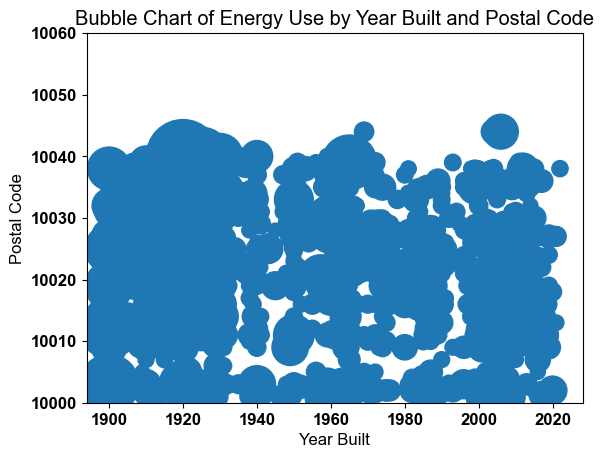

In [106]:
# Group by year and postal code and sum energy values
df_grouped = df_MD.groupby(['Year Built', 'Postal Code'])['Weather Normalized Source EUI (kBtu/ft²)'].sum().reset_index()

# Plot bubble chart
# Set x-axis limit
#plt.xlim(1900, 2000)

# Set y-axis limit
plt.ylim(10000, 10060)

plt.scatter(x=df_grouped['Year Built'], y=df_grouped['Postal Code'], s=df_grouped['Weather Normalized Source EUI (kBtu/ft²)'])
plt.xlabel('Year Built')
plt.ylabel('Postal Code')
plt.title('Bubble Chart of Energy Use by Year Built and Postal Code')

plt.show()

In [107]:
print(df_grouped)

     Year Built  Postal Code  Weather Normalized Source EUI (kBtu/ft²)
0    1900-01-01        10001                                       194
1    1900-01-01        10002                                       483
2    1900-01-01        10003                                      1847
3    1900-01-01        10004                                       399
4    1900-01-01        10007                                       117
...         ...          ...                                       ...
1197 2020-01-01        10018                                       168
1198 2021-01-01        10013                                       121
1199 2021-01-01        10027                                       205
1200 2021-01-01        10065                                       131
1201 2022-01-01        10038                                       137

[1202 rows x 3 columns]


In [108]:
#To save the unique_rows data frame to Excel
#df_grouped.to_excel("Manhattan_YearBuilt_PostalCode.xlsx", sheet_name="data", index=True)

In [109]:
#To group with more conditions
df_New = df_MD.groupby(['Year Built', 'Postal Code']).agg({'Weather Normalized Source EUI (kBtu/ft²)': 'sum', 'Property ID': 'count','ENERGY STAR Score':'median'})
# Sort by multiple columns in descending order
df_New = df_New.sort_values(by=['Weather Normalized Source EUI (kBtu/ft²)', 'Property ID'], ascending=[False, False])
df_New

# I used this dataframe to produce my conclusions. I exported to Excel and found it easier to pivot the data and create 
# a table 

Weather Normalized Source EUI (kBtu/ft²)  Property ID  \
Year Built Postal Code                                                          
1920-01-01 10031                                            3773           23   
           10033                                            3378           21   
           10032                                            2869           18   
           10040                                            2798           18   
1910-01-01 10032                                            2650           15   
...                                                          ...          ...   
1999-01-01 10009                                              98            1   
1917-01-01 10065                                              97            1   
1907-01-01 10019                                              96            1   
2014-01-01 10027                                              84            1   
1968-01-01 10025                                              79            1   

                        ENERGY STAR Score  
Year Built Postal Code                     
1920-01-01 10031                     22.0  
           10033                     34.0  
           10032                     26.0  
           10040                     33.5  
1910-01-01 10032                     15.0  
...                                   ...  
1999-01-01 10009                     35.0  
1917-01-01 10065                     37.0  
1907-01-01 10019                     45.0  
2014-01-01 10027                     38.0  
1968-01-01 10025                     46.0  

[1202 rows x 3 columns]

In [110]:
#To save the unique_rows data frame to Excel
#df_New.to_excel("Manhattan_YearBuilt_PostalCode.xlsx", sheet_name="data", index=True)

# Outputs and Visualization

# Slide 6 - Information for Top 5 contributors by Property Type

In [111]:
#To print the result table with numbers formatted with no decimals and separated in thousands, 
#you can use the pd.options.display.float_format option to set the global format for displaying floats in Pandas. 

#I will use this data for a table to use in my presentation. I will copy this information in Excel and add totals 
# at the bottom and percentages to illustrate how much they represent from the total population.

pd.options.display.float_format = '{:,.0f}'.format

#This will apply the format to all floats in your DataFrame, not just the ones you print.


#group by Primary Property Type - Self Selected and count Property IDs
result = df2.groupby (['Primary Property Type - Self Selected'])['Property ID'].count().sort_values(ascending=False); 
total = result.sum()

#add columns for sum of Weather Normalized Source EUI and Total GHG Emissions Intensity
result = result.to_frame ().join (df2.groupby (['Primary Property Type - Self Selected'])
                                  [['Weather Normalized Source EUI (kBtu/ft²)', 
                                    'Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)']].sum ())



#add a row for the total
result.loc ['Total'] = result.sum ()

#select the number of rows to display, e.g.5
result = result.head (5)

#print the output
result



,Property ID,Weather Normalized Source EUI (kBtu/ft²),Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)
Primary Property Type - Self Selected,,,
Multifamily Housing,"19,732","21,326,443","1,037,902"
Office,"2,412","328,193","12,457"
K-12 School,"1,842","211,540","9,037"
Hotel,606,"108,356","4,036"
College/University,478,"238,578","11,131"


In [112]:
#To print the sum of the columns of the above Top 5 table
print(result.sum())

Property ID                                                       25,070
Weather Normalized Source EUI (kBtu/ft²)                      22,213,111
Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)    1,074,563
dtype: float64


In [113]:
#To print the Grand-Total of the columns for the entire dataset.
df_Total = df2.groupby (['Primary Property Type - Self Selected']).agg({'Property ID':'count',
                                                             'Weather Normalized Source EUI (kBtu/ft²)':'sum',
                                                            'Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)':'sum'})

# Add a row that sums all the previous rows
df_Total.loc['Total'] = df_Total.sum()

df_Total.loc['Total']

Property ID                                                       30,485
Weather Normalized Source EUI (kBtu/ft²)                      23,416,633
Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)    1,120,080
Name: Total, dtype: float64

# Slide 6 - Bar Chart with the median of Energy Star Score

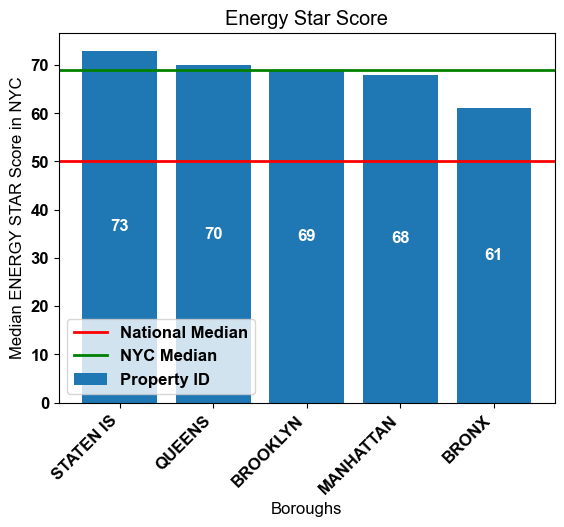

In [114]:
#To create a bar chart showing the median Energy STAR Score by NYC borough sorted in descending order.
# The idea is to insert the overall median for NYC and the national median as straight lines.

# Set the font parameters
plt.rcParams['font.family'] = 'arial'
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.style'] = 'normal'

# Create a bar chart
ax = df_STAR.plot(kind='bar', x='Borough', y='ENERGY STAR Score', label='Property ID', width=0.8)
ax.set_title("Energy Star Score")

# Add a title for the y-axis
ax.set_ylabel('Median ENERGY STAR Score in NYC')

# Change the name of the x-axis
ax.set_xlabel('Boroughs')


#Center the labels in the bars
ax.bar_label(ax.containers[0], label_type='center', color='white', fmt='{0:,.0f}')


# Rotate and align the x-axis labels
plt.xticks(rotation=45, ha='right')

#To show the values on the y-axis in thousands, you can use the .yaxis.set_major_formatter() method on the ax 
#object and pass a StrMethodFormatter object with the format string ‘{x:,.0f}K’. 
#This will format the y-axis values with a comma as the thousands separator, a zero decimal precision, 
#and a K suffix to indicate thousands. For example, you can do the following:
# Import the StrMethodFormatter class
from matplotlib.ticker import StrMethodFormatter

# Format the y-axis values in thousands
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))


#To add two horizontal lines at different levels of Energy Star Score in the y-axis in different colors and add 
#some legend to them, you can use the .axhline() method on the ax object and pass the y value, the color, and 
#the label for each line. The .axhline() method draws a horizontal line across the plot at a given y value. 
#You can also use the .legend() method on the ax object to show the legend for the lines and the bars. 
#For example, you can do the following:

# Add two horizontal lines with different colors and labels
ax.axhline(y=50, color='red', label='National Median', linewidth=2)
ax.axhline(y=69, color='green', label='NYC Median', linewidth=2)

# Show the legend for the lines and the bars
ax.legend()


# Show the plot
plt.show()

# Slide 7 - Bar Chart Energy Use Intensity by Borough

Borough
MANHATTAN   722,296
BROOKLYN    519,439
BRONX       487,131
QUEENS      308,715
STATEN IS    15,642
Name: Weather Normalized Source EUI (kBtu/ft²), dtype: float64

Total: 2053222.6


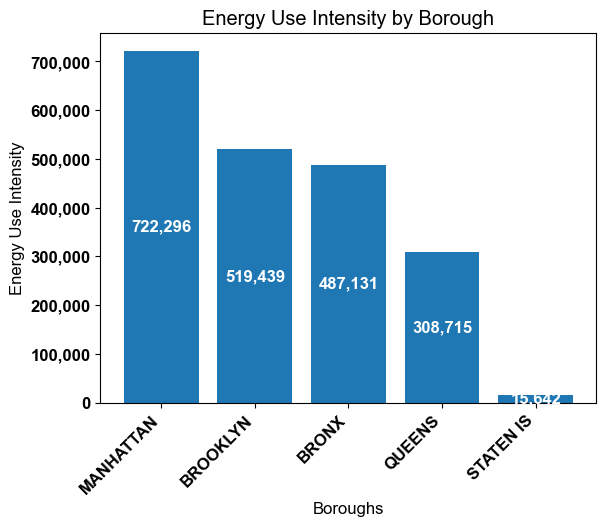

In [115]:
#To see how many properties records there are by Energy Use Intensity by Borough sorted in descending order.
df_EUI = unique_rows.groupby (['Borough'])['Weather Normalized Source EUI (kBtu/ft²)'].sum().sort_values(ascending=False)
total = df_EUI.sum()
print (df_EUI)
print (f"\nTotal: {total}")

# To Create a Bar Chart
# Set the font parameters
plt.rcParams['font.family'] = 'arial'
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.style'] = 'normal'

# Create a bar chart
ax = df_EUI.plot(kind='bar', x='Borough', y='Weather Normalized Source EUI (kBtu/ft²)', label='Property ID', width=0.8)
ax.set_title("Energy Use Intensity by Borough")

# Add a title for the y-axis
ax.set_ylabel('Energy Use Intensity')

# Change the name of the x-axis
ax.set_xlabel('Boroughs')

#for p in ax.patches:
#    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    
#Center the labels in the bars
ax.bar_label(ax.containers[0], label_type='center', color='white', fmt='{0:,.0f}')


# Rotate and align the x-axis labels
plt.xticks(rotation=45, ha='right')

#To show the values on the y-axis in thousands, you can use the .yaxis.set_major_formatter() method on the ax 
#object and pass a StrMethodFormatter object with the format string ‘{x:,.0f}K’. 
#This will format the y-axis values with a comma as the thousands separator, a zero decimal precision, 
#and a K suffix to indicate thousands. For example, you can do the following:
# Import the StrMethodFormatter class
from matplotlib.ticker import StrMethodFormatter

# Format the y-axis values in thousands
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

#To show the labels on top of the bars in thousands, you can modify the .annotate() method inside the for loop 
#and pass the same format string ‘{x:,.0f}K’ to the str.format() method. 
#This will format the labels with a comma as the thousands separator, a zero decimal precision, and a K suffix to 
#indicate thousands. For example, you can do the following:

# Format the labels in thousands
#for p in ax.patches:
#ax.annotate('{x:,.0f}'.format(x=p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Show the plot
plt.show()

# Slide 7 - Bar Chart Greenhouse Emissions by Borough

Borough
MANHATTAN   31,113
BROOKLYN    21,935
BRONX       21,880
QUEENS      13,553
STATEN IS      656
Name: Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²), dtype: float64

Total: 89136.4


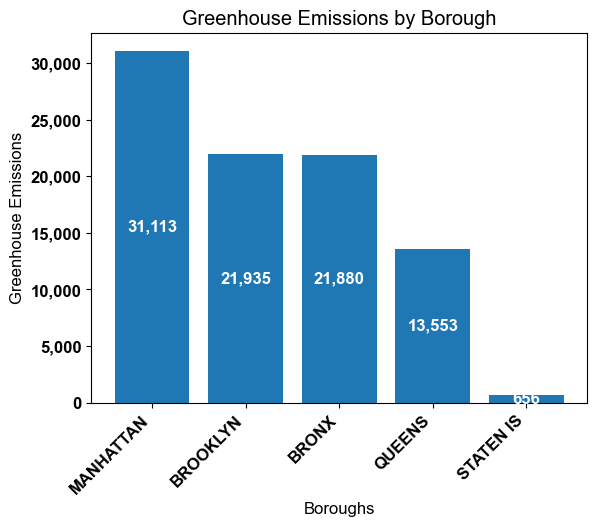

In [116]:
#To see how many properties records there are by Green House (GHG) Emissions by Borough sorted in descending order.
df_GHG = unique_rows.groupby (['Borough'])['Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)'].sum().sort_values(ascending=False)
total = df_GHG.sum()
print (df_GHG)
print (f"\nTotal: {total}")

# To create a Bar Chart
# Set the font parameters
plt.rcParams['font.family'] = 'arial'
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.style'] = 'normal'

# Create a bar chart
ax = df_GHG.plot(kind='bar', x='Borough', y='Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)', label='Property ID', width=0.8)
ax.set_title("Greenhouse Emissions by Borough")

# Add a title for the y-axis
ax.set_ylabel('Greenhouse Emissions')

# Change the name of the x-axis
ax.set_xlabel('Boroughs')


#Center the labels in the bars
ax.bar_label(ax.containers[0], label_type='center', color='white', fmt='{0:,.0f}')


# Rotate and align the x-axis labels
plt.xticks(rotation=45, ha='right')

#To show the values on the y-axis in thousands, you can use the .yaxis.set_major_formatter() method on the ax 
#object and pass a StrMethodFormatter object with the format string ‘{x:,.0f}K’. 
#This will format the y-axis values with a comma as the thousands separator, a zero decimal precision, 
#and a K suffix to indicate thousands. For example, you can do the following:
# Import the StrMethodFormatter class
from matplotlib.ticker import StrMethodFormatter

# Format the y-axis values in thousands
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))


# Show the plot
plt.show()

# Slide 7 - Number of Multifamily Housing Buildings in NYC

In [117]:
#To see how many properties records there are by borough sorted in descending order. 
#This after dropping Nassau, Suffolk and Yonkers.

df5 = unique_rows.groupby (['Borough'])['Property ID'].count().sort_values(ascending=False)
total = df5.sum()
print (df5)
print (f"\nTotal: {total}")

Borough
MANHATTAN    6016
BROOKLYN     4698
BRONX        4055
QUEENS       2828
STATEN IS     125
Name: Property ID, dtype: int64

Total: 17722


# Slide 8 - Bar Chart Properties by Building Energy Efficiency Rating

BEER
D    6513
A    4929
B    3402
C    2878
Name: Property ID, dtype: int64

Total: 17722


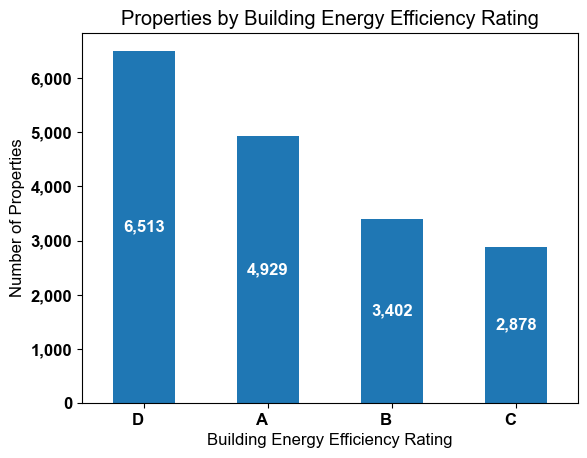

In [118]:
#To see how many properties records there are by Building Energy Efficiency Ratings (BEER) sorted in descending order.
df6 = unique_rows.groupby (['BEER'])['Property ID'].count().sort_values(ascending=False)
total = df6.sum()
print (df6)
print (f"\nTotal: {total}")

#To create a Bar Chart
# Set the font parameters
plt.rcParams['font.family'] = 'arial'
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.style'] = 'normal'

# Create a bar chart
ax = df6.plot(kind='bar', x='BEER', y='Property ID', label='Property ID')
ax.set_title("Properties by Building Energy Efficiency Rating")

# Add a title for the y-axis
ax.set_ylabel('Number of Properties')

# Change the name of the x-axis
ax.set_xlabel('Building Energy Efficiency Rating')

# Center the labels in the bars
ax.bar_label(ax.containers[0], label_type='center', color='white', fmt='{0:,.0f}')


# Rotate and align the x-axis labels
plt.xticks(rotation=0, ha='right')

# Import the StrMethodFormatter class
from matplotlib.ticker import StrMethodFormatter

# Format the y-axis values in thousands
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))



# Show the plot
plt.show()

# Slide 8 - Bar Chart Buildings by Borough and Energy Efficiency Rating

Borough    BEER
MANHATTAN  D       2216
           A       1741
BRONX      D       1722
BROOKLYN   D       1599
           A       1335
MANHATTAN  B       1142
BROOKLYN   B        987
BRONX      A        971
QUEENS     D        932
MANHATTAN  C        917
QUEENS     A        845
BROOKLYN   C        777
BRONX      C        696
           B        666
QUEENS     B        578
           C        473
STATEN IS  D         44
           A         37
           B         29
           C         15
Name: Property ID, dtype: int64

Total: 17722


Text(0, 0.5, 'Number of Properties')

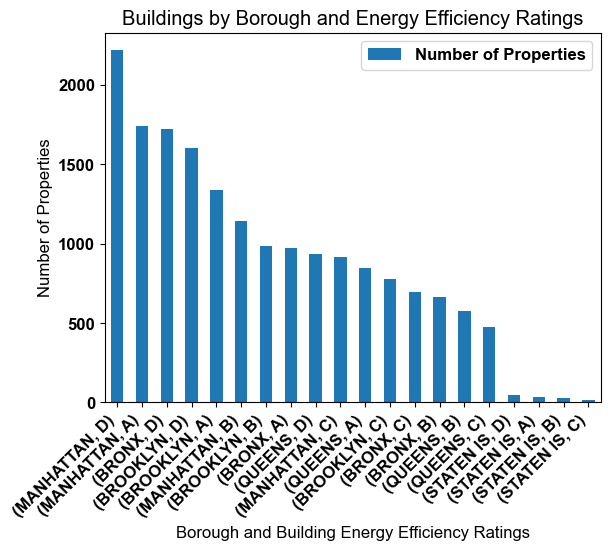

In [119]:
#To see how many properties records there are by Building Energy Efficiency Ratings (BEER) sorted in descending order.
df10 = unique_rows.groupby (['Borough','BEER'])['Property ID'].count().sort_values(ascending=False)
total10 = df10.sum()
print (df10)
print (f"\nTotal: {total10}")

# Create a bar chart from the Series
ax = df10.plot.bar(title="Buildings by Borough and Energy Efficiency Ratings")


# Add a legend to the chart
ax.legend(["Number of Properties"])

# Rotate and align the x-axis labels
plt.xticks(rotation=45, ha='right')

# Add labels to the axes
ax.set_xlabel("Borough and Building Energy Efficiency Ratings")
ax.set_ylabel("Number of Properties")

# Slide 9 - Scatter Plot Chart Weather Normalized Source Energy Use Intensity vs Greenhouse Emissions Intensity

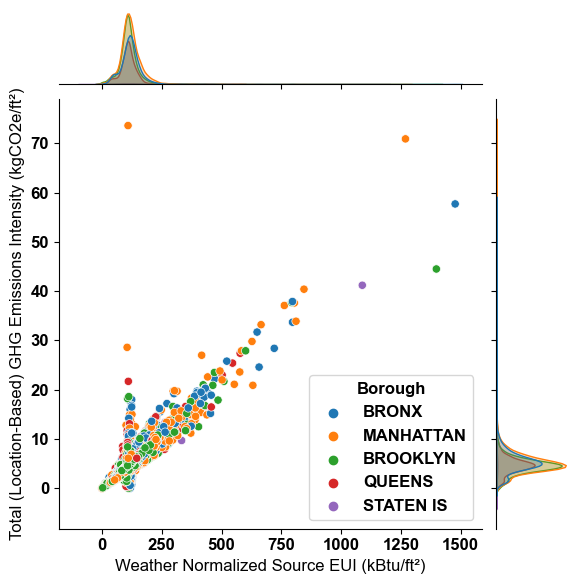

In [120]:
#To plot the Weather Normalized Source EUI (kBtu/ft²) versus Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²).
# In other words, to plot Energy Use Intensity vs Green House Emissions, which shows a direct correlation.

sns.jointplot(data=unique_rows, x="Weather Normalized Source EUI (kBtu/ft²)", y="Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)", hue="Borough")

# Slide 9 - Scatter Plot Chart Year Built vs Greenhouse Emissions Intensity

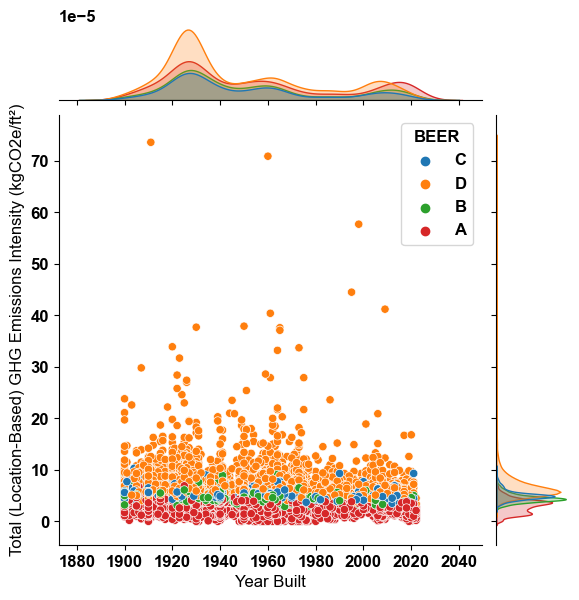

In [122]:
#To plot the GHG Emmissions Intensity and Years Built
sns.jointplot(data=df_1900, x="Year Built", y="Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)",hue='BEER')

# Slide 9 - Scatter Plot Chart Postal Codes vs Greenhouse Emissions Intensity

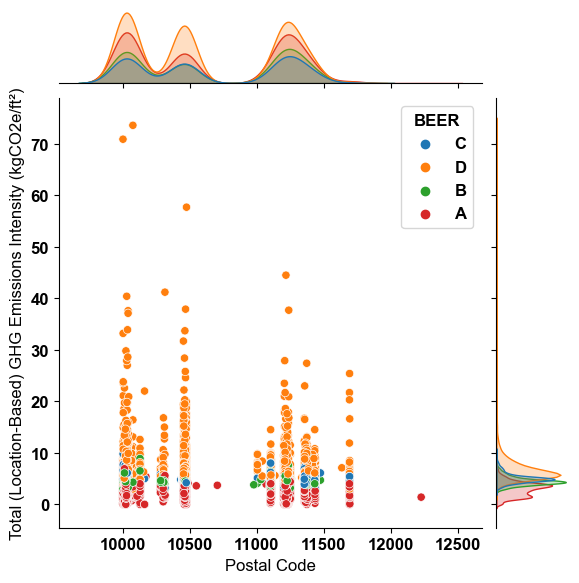

In [123]:
#To plot the GHG Emmissions Intensity and Years Built
sns.jointplot(data=df_1900, x="Postal Code", y="Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)",hue='BEER')



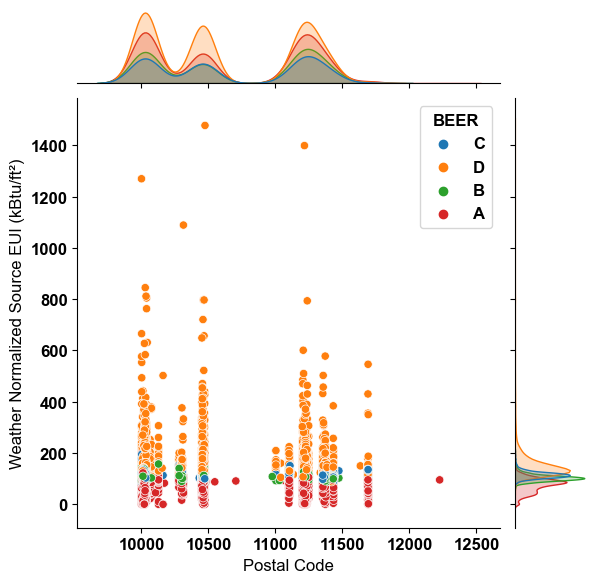

In [124]:
#To plot the Energy Use Intensity and Postal Codes. This chart shows somehow a similar picture as above 
#because there is a direct correlation between energy usage and greenhouse emissions
sns.jointplot(data=df_1900, x="Postal Code", y="Weather Normalized Source EUI (kBtu/ft²)",hue='BEER')


# Slide 10 - Conclusions

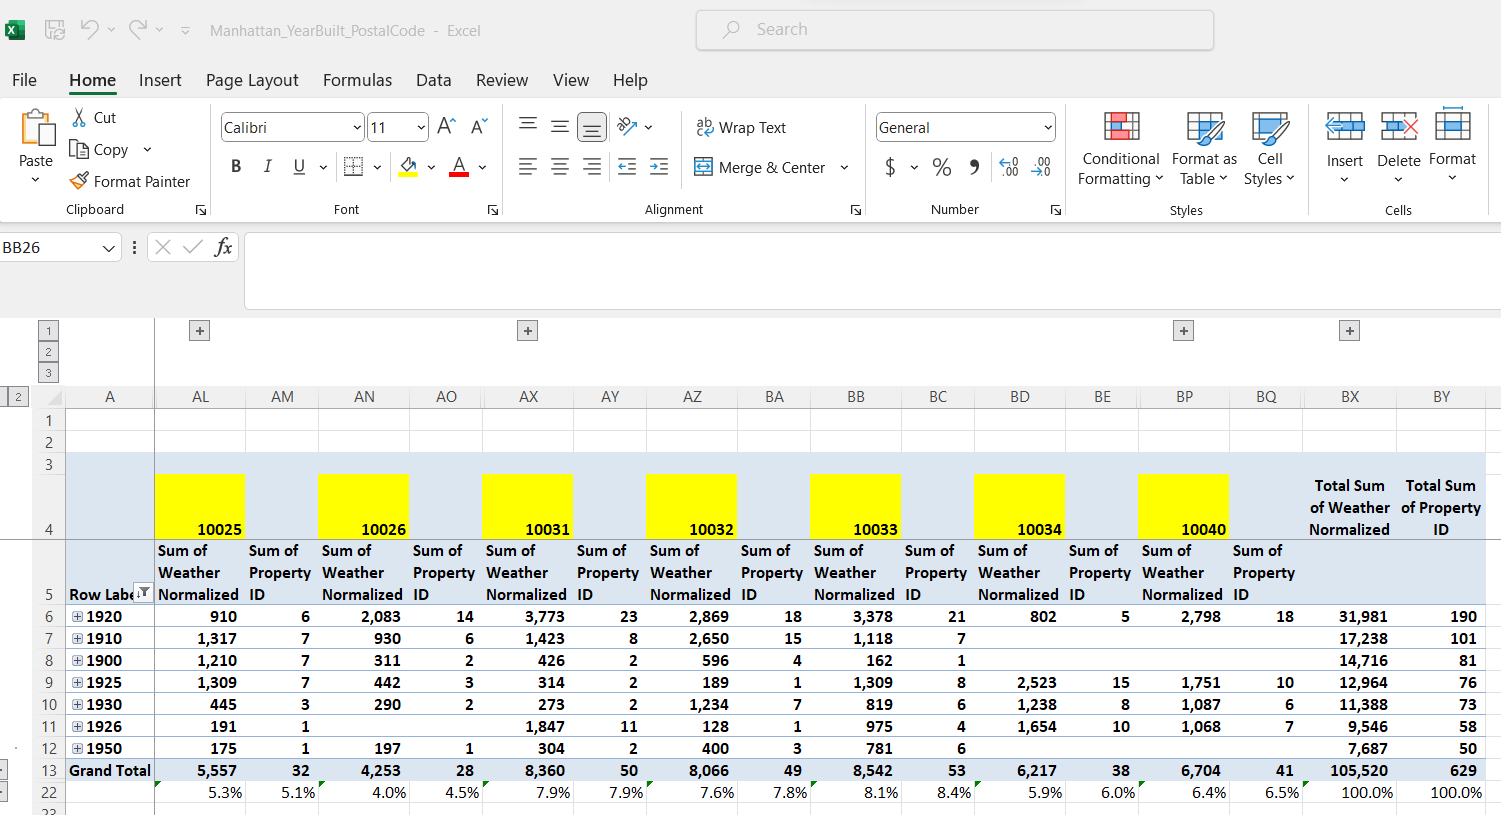

In [125]:
# As stated above, I found it easier to export the data to excel and pivot it in order to create a summarized table
# showing the particular years and zip codes driving the energy consumption which ultimately is responsible of the
# greenhouse emissions.

#To save the unique_rows data frame to Excel
#df_New.to_excel("Manhattan_YearBuilt_PostalCode.xlsx", sheet_name="data", index=True)

# Import the display and Image functions
from IPython.display import display, Image

# Load an image from a file
img = Image(filename='Pivot_Conclusion.png')

# Display the image
display(img)

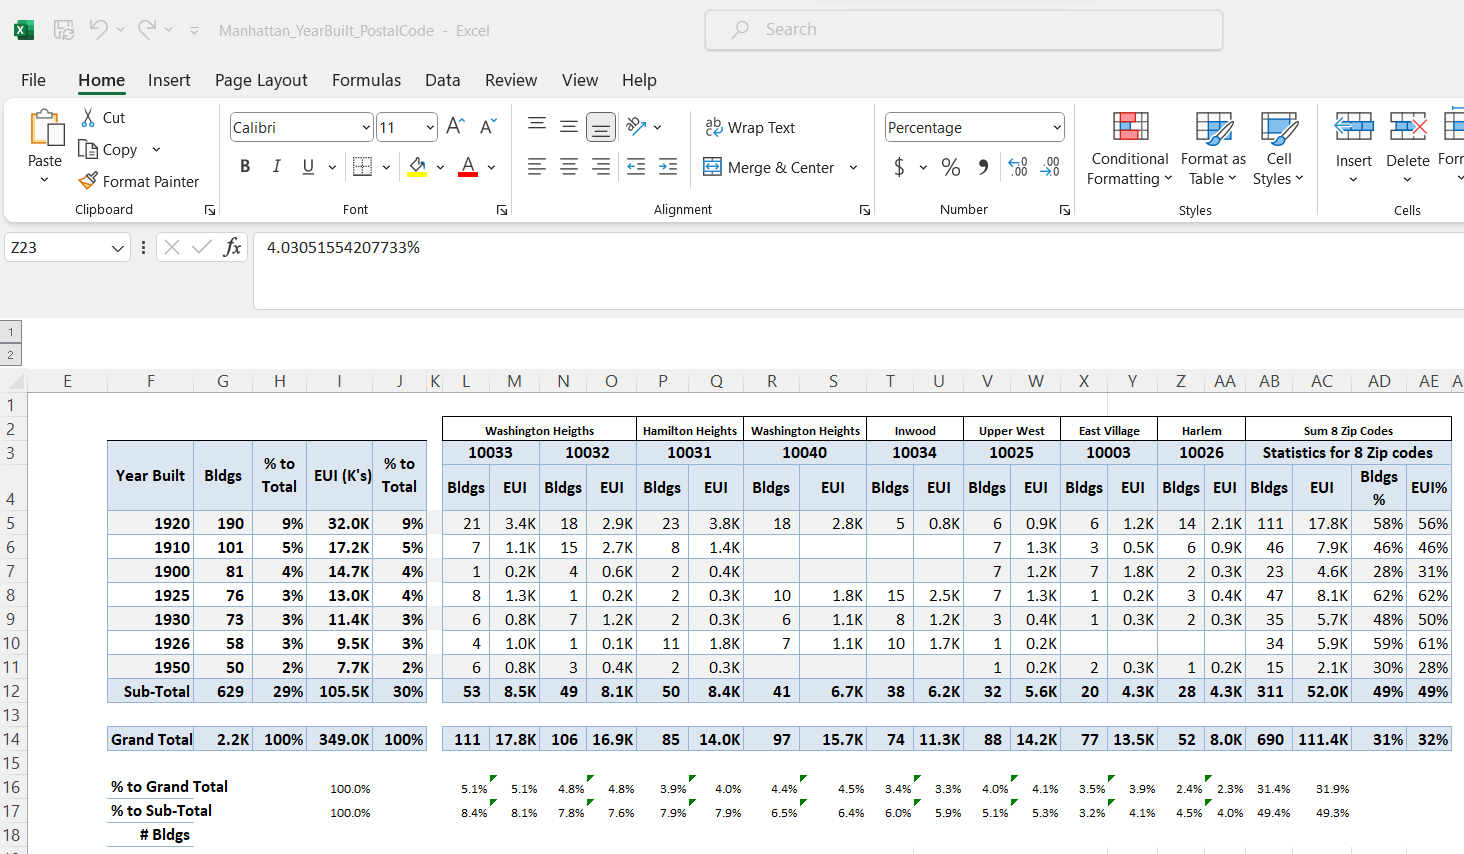

In [126]:
# Import the display and Image functions
from IPython.display import display, Image

# Load an image from a file
img = Image(filename='Table_Conclusions.png')

# Display the image
display(img)

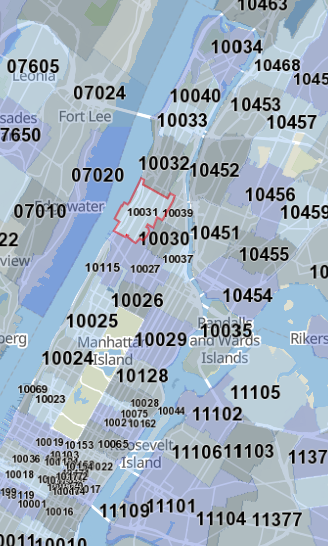

In [127]:
# Since I could not create a choropleth map with the involved zip codes, I got the below map and highlighted
#the zip codes involved except for the East Village

# Import the display and Image functions
from IPython.display import display, Image

# Load an image from a file
img = Image(filename='Manhattan_Zip_Map.png')

# Display the image
display(img)

# Other Visualizations not considered

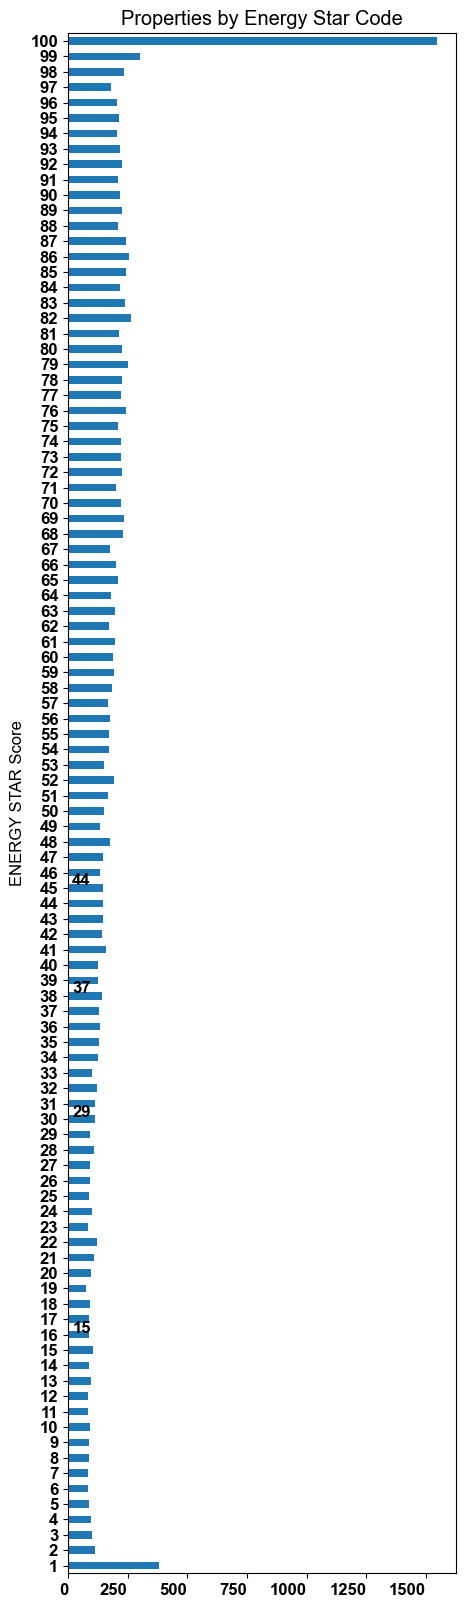

In [128]:
# Create a bar chart with a larger size
ay = df7.plot(kind='barh', x='ENERGY Star Code', y='Property ID', figsize=(5, 20))
ay.set_title("Properties by Energy Star Code")
# Rotate and align the x-axis labels
plt.xticks(rotation=0, ha='right')
for p in ax.patches:
    ay.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

# Show the plot
plt.show()

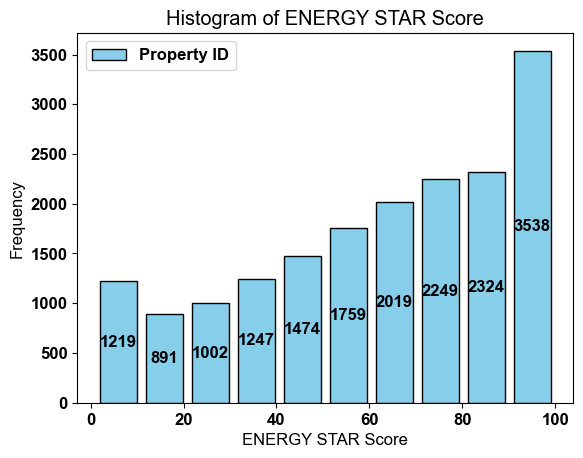

In [129]:
# Create a list of values
values = unique_rows['ENERGY STAR Score']

# Create a histogram with 10 bins
ax = plt.hist(values, bins=10, color='skyblue', edgecolor='black', rwidth=0.8)

# Add labels, title, and legend
plt.xlabel('ENERGY STAR Score')
plt.ylabel('Frequency')
plt.title('Histogram of ENERGY STAR Score')
plt.legend(['Property ID'])

# Loop over the bars and add the values without decimals
for i in range(10):
    # Get the height and position of the bar
    height = ax[2][i].get_height()
    x = ax[2][i].get_x()
    width = ax[2][i].get_width()
    
    # Add the text at the center of the bar with no decimals
    plt.annotate('%.0f' % height, xy=(x + width/2, height/2), ha='center', va='center')

# Show the plot
plt.show()

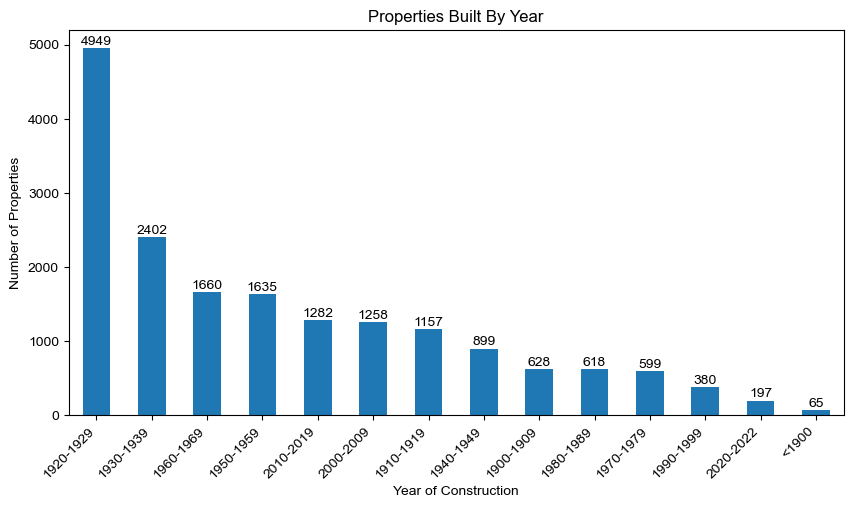

In [130]:
# Set the font parameters
plt.rcParams['font.family'] = 'arial'
plt.rcParams['font.size'] = 10
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.style'] = 'normal'

# Create a bar chart
ax = df8.plot(kind='bar', x='Year Bracket', y='Property ID', label='Property ID', figsize=(10, 5))
ax.set_title("Properties Built By Year")

# Add a title for the y-axis
ax.set_ylabel('Number of Properties')

# Change the name of the x-axis
ax.set_xlabel('Year of Construction')



# Loop over the bars and add the values
for i in range(len(ax.containers[0])):
    # Get the height and position of the bar
    height = ax.containers[0][i].get_height()
    x = ax.containers[0][i].get_x()
    width = ax.containers[0][i].get_width()
    
    # Add the text above the bar with the y-axis value
    ax.text(x + width/2, height + 5, str(height), ha='center', va='bottom')


# Rotate and align the x-axis labels
plt.xticks(rotation=45, ha='right')


# Show the plot
plt.show()

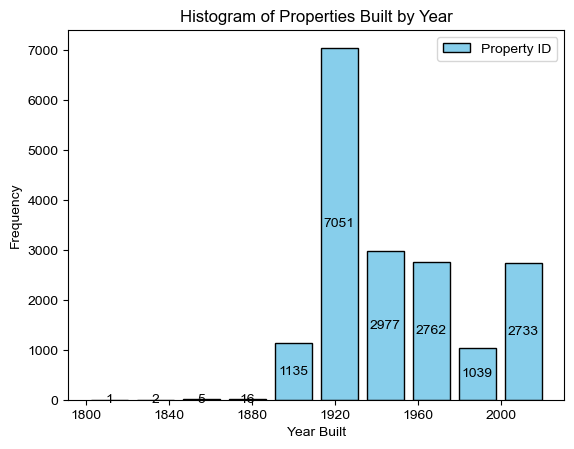

In [131]:
values1 = unique_rows['Year Built']

# Create a histogram with 10 bins
ax = plt.hist(values1, bins=10, color='skyblue', edgecolor='black', rwidth=0.8)

# Add labels, title, and legend
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.title('Histogram of Properties Built by Year')
plt.legend(['Property ID'])

# Loop over the bars and add the values without decimals
for i in range(10):
    # Get the height and position of the bar
    height = ax[2][i].get_height()
    x = ax[2][i].get_x()
    width = ax[2][i].get_width()
    
    # Add the text at the center of the bar with no decimals
    plt.annotate('%.0f' % height, xy=(x + width/2, height/2), ha='center', va='center')

# Show the plot
plt.show()

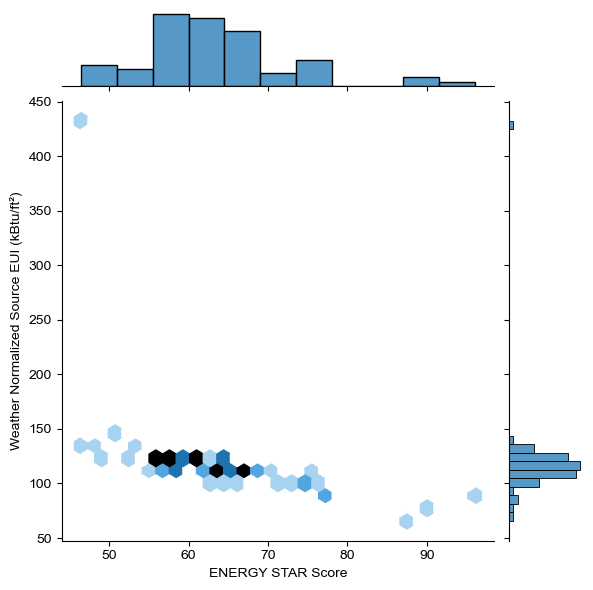

In [132]:
#To see how many buildings were built by Borough and year bracket, showing the mean Building Energy Efficiency Rating 
# (BEER:A,B,C,D) the mean energy star score, the mean energy use intensity and the mean GHG emiisions intensity.

df10 = unique_rows.groupby (['Borough','Year Bracket']).agg({'Property ID':'count','BEER':'first','ENERGY STAR Score':'mean',
                                                             'Weather Normalized Source EUI (kBtu/ft²)':'mean',
                                                            'Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)':'mean'})

#To visualize the Weather Normalized Source EUI (kBtu/ft²) in relation to the ENERGY STAR Score. 
#Here we can see that there was a greater frequency between 55 and 65 Energy Star Score
# and roughly 125 Weather Normalized Source EUI (kBtu/ft²).

sns.jointplot(x='ENERGY STAR Score', y='Weather Normalized Source EUI (kBtu/ft²)', data=df10, kind='hex')


C:\Users\Marcelo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


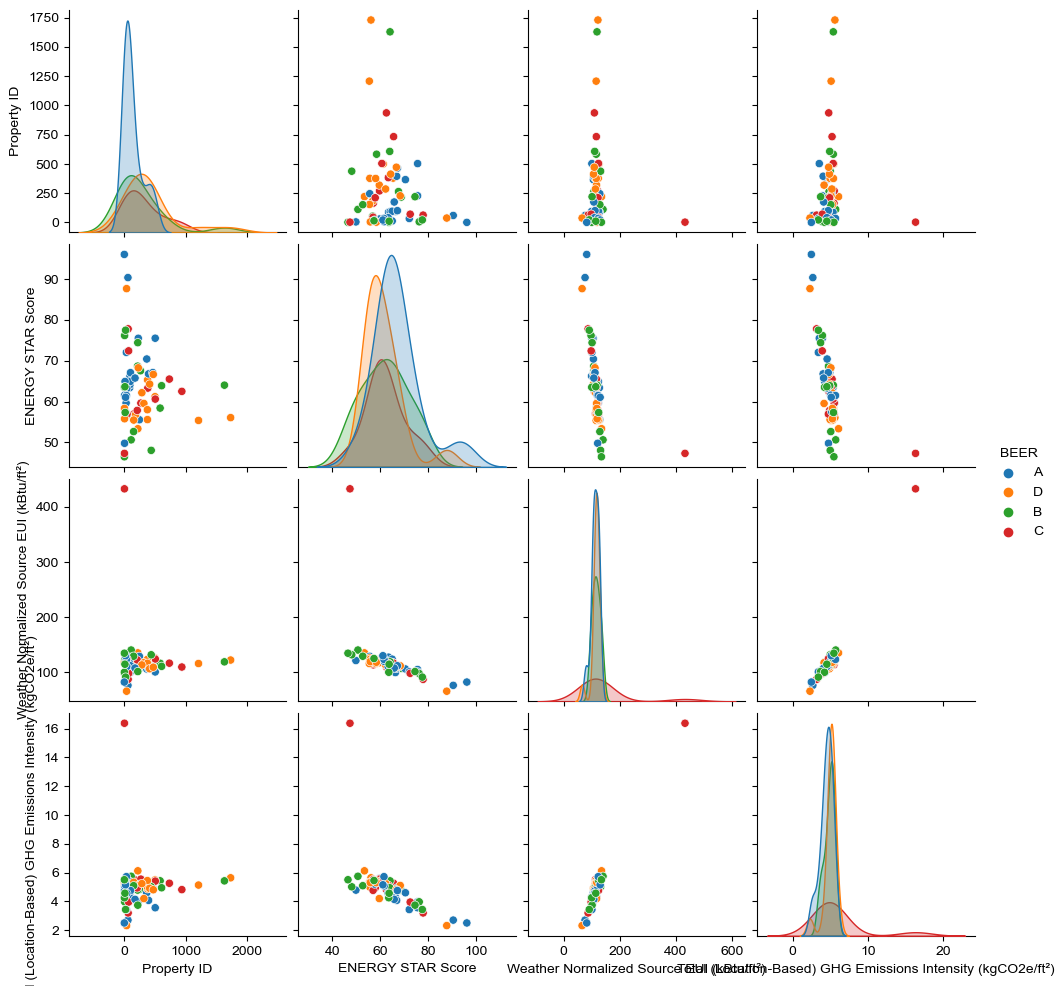

In [133]:
#Here we can observe the relationships among Weather Normalized Source EUI (kBtu/ft²), ENERGY STAR Score and Property ID 
# by building energy efficiency ratings.
sns.pairplot(df10, hue='BEER')

C:\Users\Marcelo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


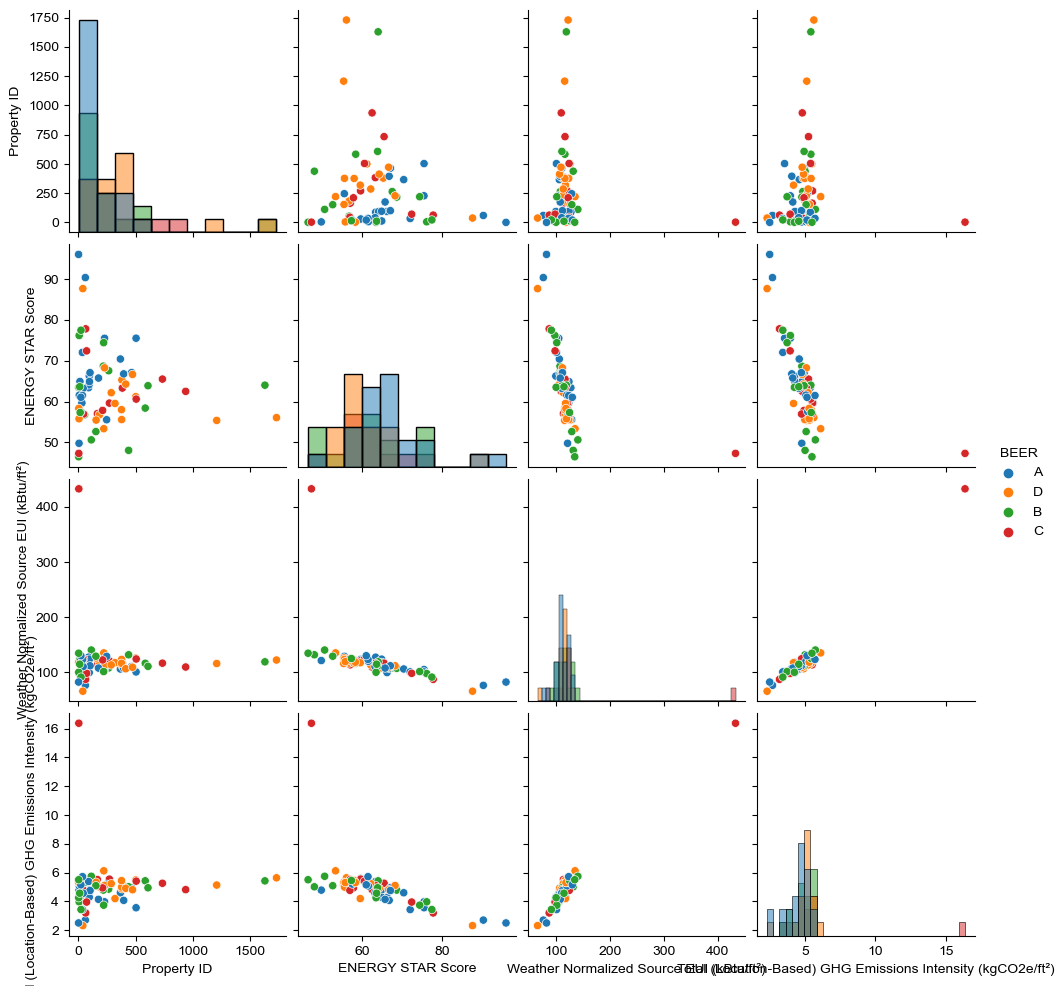

In [134]:
#Here we can observe the relationships among Weather Normalized Source EUI (kBtu/ft²), ENERGY STAR Score and Property ID 
# by building energy efficiency ratings with a stacked histogram.
sns.pairplot(df10, hue='BEER', diag_kind="hist")

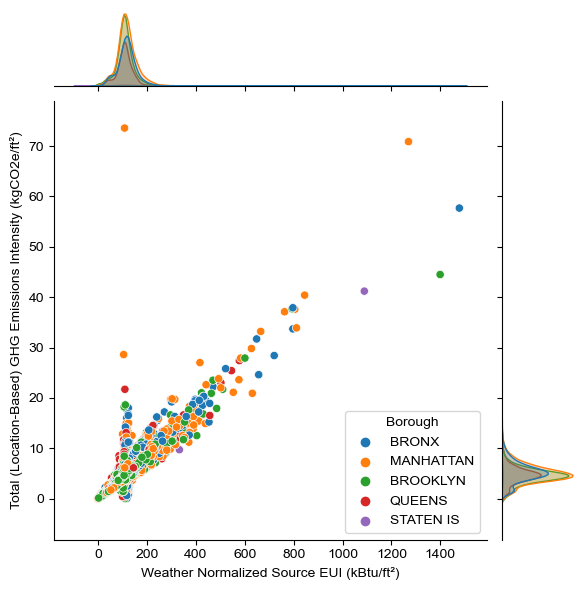

In [135]:
#To plot the Weather Normalized Source EUI (kBtu/ft²) versus Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²).
# In other words, to plot Energy Use Intensity vs Green House Emissions, which shows a direct correlation.

sns.jointplot(data=unique_rows, x="Weather Normalized Source EUI (kBtu/ft²)", y="Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)", hue="Borough")

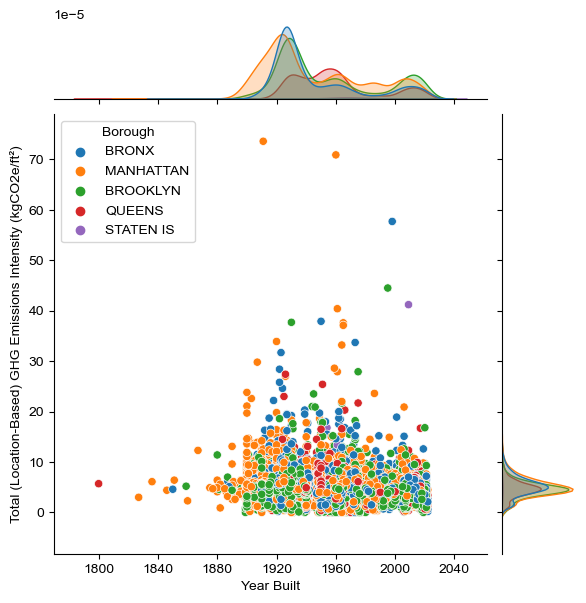

In [136]:
#To plot Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²) vs. Year Built
# Here we can see the bulk of the buildings were built somewehere between 1900 and 1950 and the bulk of the greenhouse
#emissions lays between 0 and 10 kgCO2e/ft2 but there are few outliers in every borough, but seems to be more in Manhattan
sns.jointplot(data=unique_rows, x="Year Built", y="Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)", hue="Borough")

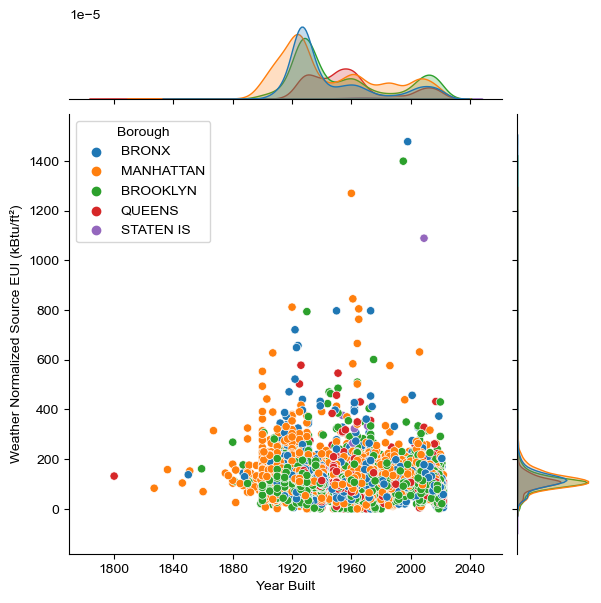

In [137]:
#To plot Weather Normalized Source EUI (kBtu/ft²) vs. Year Built
# Here we can see the bulk of the buildings were built somewehere between 1900 and 1950 and the bulk of the energy
#use lays between 0 and 200 kBtu/ft2 but there are few outliers in every borough, but seems to be more in Manhattan
sns.jointplot(data=unique_rows, x="Year Built", y="Weather Normalized Source EUI (kBtu/ft²)", hue="Borough")

<Axes: xlabel='Postal Code', ylabel='Weather Normalized Source EUI (kBtu/ft²)'>

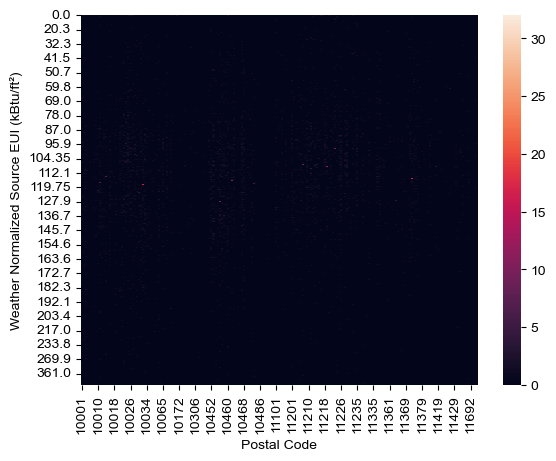

In [138]:
# Create a pivot table with Postal Code as columns and Property ID as values. Replaced NaN with zeros
table = unique_rows.pivot_table(values='Property ID', index=['Weather Normalized Source EUI (kBtu/ft²)'], 
                                columns='Postal Code', aggfunc='count',fill_value=0) 

#To show a heatmap of the Weather Normalized Source EUI (kBtu/ft²) by Postal Code
# create a heatmap from the pivot table with the "rocket" colormap
sns.heatmap(table, cmap="rocket")

#The heatmap doesn't show what was expected. Perhaps I need to change the parameters.

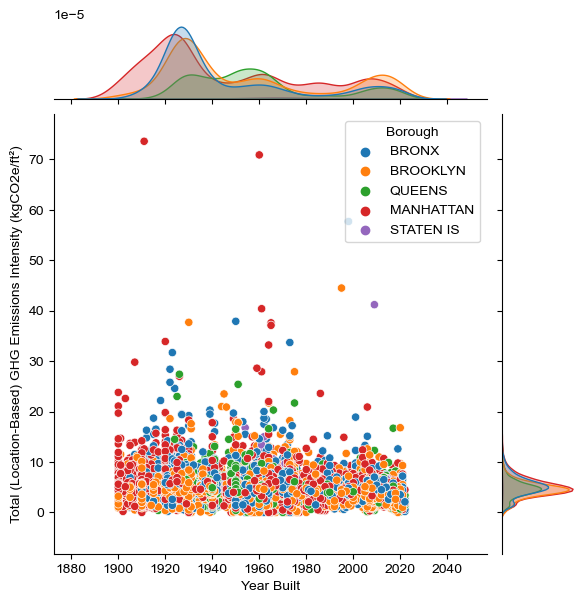

In [139]:
# To plot GHG Emmissions Intensity vs. Year Built
# Here we can see the bulk of the buildings were built somewehere between 1900 and 1950 and the bulk of the GHG emissions
# lays between 0 and 10 kgCO2e/ft2 but there are few outliers in every borough.
sns.jointplot(data=df_1900, x="Year Built", y="Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)", hue="Borough")

<Axes: xlabel='Postal Code', ylabel='ENERGY STAR Score'>

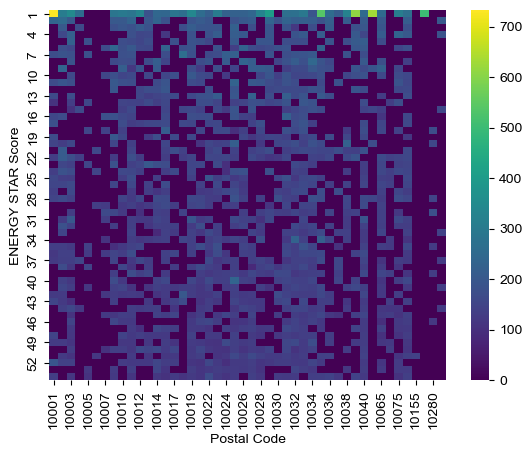

In [140]:
# create a pivot table with months as columns and count as values. Replaced NaN with zeros
table = df_MD.pivot_table(values='Weather Normalized Source EUI (kBtu/ft²)', index=['ENERGY STAR Score'], columns='Postal Code', aggfunc='mean',fill_value=0)

#To show a heatmap of the Assault 3rd degree and related offenses by borough per month
# create a heatmap from the pivot table with the "rocket" colormap
sns.heatmap(table, cmap="viridis")

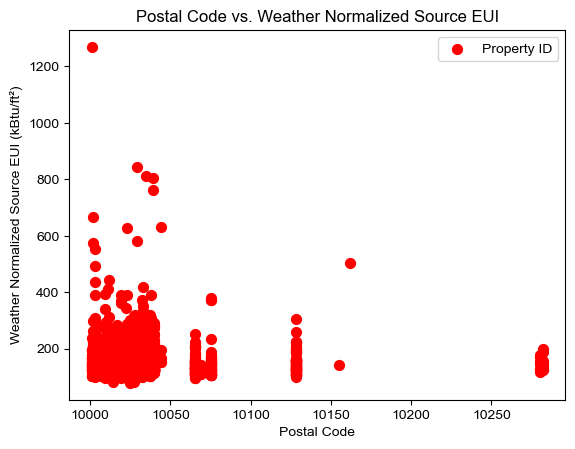

In [141]:
# Create a scatter plot chart
ax = df_MD.plot.scatter(x='Postal Code', y='Weather Normalized Source EUI (kBtu/ft²)', c='red', s=50, label='Property ID')
ax.set_title('Postal Code vs. Weather Normalized Source EUI')
ax.set_xlabel('Postal Code')
ax.set_ylabel('Weather Normalized Source EUI (kBtu/ft²)')
plt.show()

#This chart shows a concentration of energy usage in a range of postal codes from 10000 to 10050 and there are few pockets

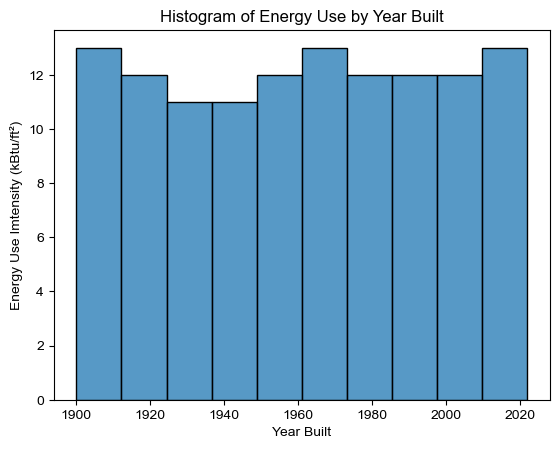

In [142]:
# Group by year and sum of energy usage values
df_year = df_MD.groupby(['Year Built'])['Weather Normalized Source EUI (kBtu/ft²)'].sum()
# Plot histogram
sns.histplot(data=df_year, x="Year Built", bins=10)
plt.xlabel('Year Built')
plt.ylabel('Energy Use Imtensity (kBtu/ft²)')
plt.title('Histogram of Energy Use by Year Built')
plt.show()

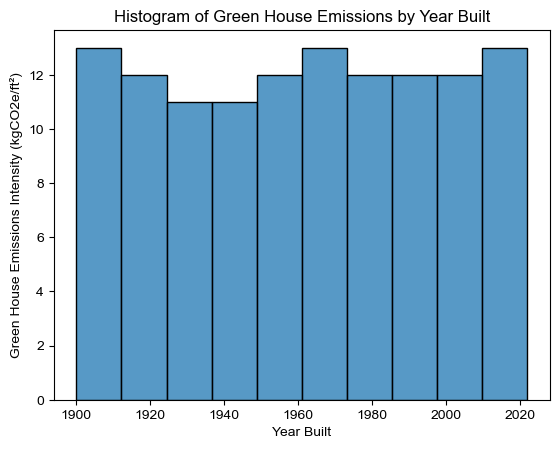

In [143]:
# Group by year and sum of energy usage values
df_year = df_MD.groupby(['Year Built'])['Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)'].sum()
# Plot histogram
sns.histplot(data=df_year, x="Year Built", bins=10)
plt.xlabel('Year Built')
plt.ylabel('Green House Emissions Intensity (kgCO2e/ft²)')
plt.title('Histogram of Green House Emissions by Year Built')
plt.show()

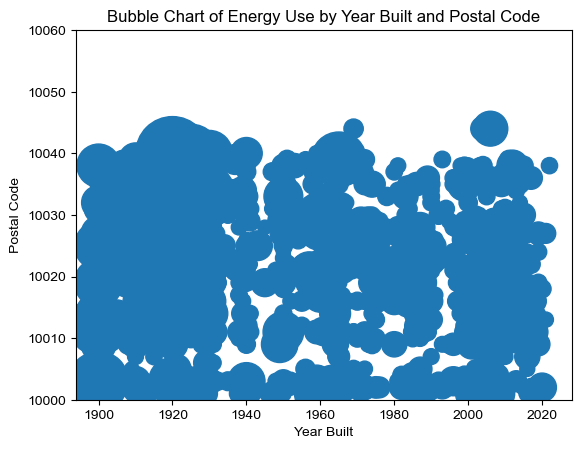

In [144]:
# Group by year and postal code and sum energy values
df_grouped = df_MD.groupby(['Year Built', 'Postal Code'])['Weather Normalized Source EUI (kBtu/ft²)'].sum().reset_index()

# Plot bubble chart
# Set x-axis limit
#plt.xlim(1900, 2000)

# Set y-axis limit
plt.ylim(10000, 10060)

plt.scatter(x=df_grouped['Year Built'], y=df_grouped['Postal Code'], s=df_grouped['Weather Normalized Source EUI (kBtu/ft²)'])
plt.xlabel('Year Built')
plt.ylabel('Postal Code')
plt.title('Bubble Chart of Energy Use by Year Built and Postal Code')

plt.show()

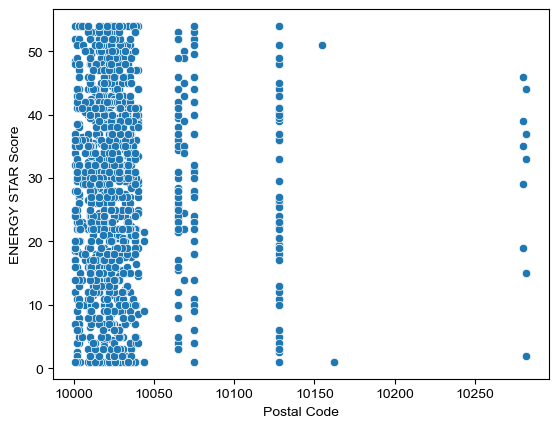

In [145]:
# Create a scatter plot
sns.scatterplot(x='Postal Code', y='ENERGY STAR Score', data=df_New)

# Show the plot
plt.show()


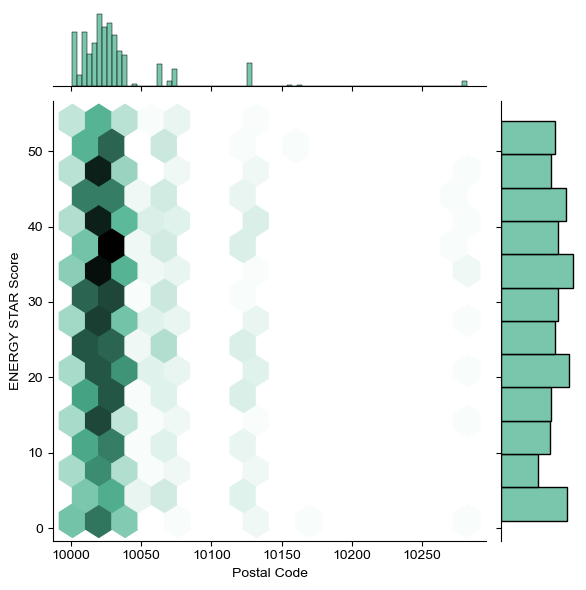

In [146]:
# Create a hexbin plot
sns.jointplot(x='Postal Code', y='ENERGY STAR Score', data=df_New, kind='hex', color='#4CB391', gridsize=15)

# Show the plot
plt.show()